# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Цель исследования

1. Выявить определяющие успешность закономерности игры
2. сделать прогнoз на компанию 2017

### Ход Исследования

Данные о недвижимости я получу из файла  '/datasets/games.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Таким образом, моё исследование пройдет в 7 этапов:
- Обзор данных
- Предобработка данных
- Расчет и добавлние результатов в таблицу
- Проведу исследовательский анализ данных
- Составлю портрет пользователя каждого региона
- Проверю гипотезы
- Написание общего вывода

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

### Шаг 0. Подключение библиотек

In [8]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from matplotlib import rcParams 
rcParams['figure.dpi'] = 300

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Сперва загрузим файл и отобразим 5 строк

In [9]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('D:\DDownloads/games.csv')

In [10]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11970,Magi: The Labyrinth of Beginning,3DS,2013.0,Role-Playing,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12841,Whiplash,XB,2003.0,Racing,0.04,0.01,0.00,0.00,68.0,tbd,T
6152,Surf's Up,DS,2007.0,Sports,0.26,0.00,0.00,0.02,56.0,7,E
6224,Dave Mirra Freestyle BMX 2,GC,2001.0,Sports,0.21,0.06,0.00,0.01,78.0,7.7,T
2712,Harry Potter and the Half-Blood Prince,Wii,2009.0,Action,0.28,0.39,0.00,0.08,60.0,6,E10+


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В целом данные выглядят хорошо, но что первым бросается в глаза, колонка Year_of_Release  нужно перевести в datetime из object. Так же есть пропуски около 50% в колонках Other_sales, Critic_Score, User_Score. В следующем шаге обработаем данные

### Шаг 2. Подготовьте данные

In [12]:
# приводим к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [13]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print(column.describe())


#### 1. Обработка "name"



* Изучим значения


In [14]:
investigate_column(df["name"])

Null or Na count is 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object



* Вывод
	- Обнаруженные аномалии: 2 пропущенных значения
	- Причины, по которым они могли возникнуть: ошибка при выгрузке или человечискйи фактор
	- Как исправлять: оставим как есть, всего 2 строки
	- Финальный тип и почему: ...



* Изменение



#### 2. Обработка "platform"



* Изучим значения


In [ ]:
investigate_column(df["platform"])


* Вывод
	- Обнаруженные аномалии: нет
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: оставим как есть
	- Финальный тип и почему: ...



* Изменение



#### 3. Обработка "year_of_release"



* Изучим значения


In [16]:
investigate_column(df["year_of_release"])

Null or Na count is 269
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64



* Вывод
	- Обнаруженные аномалии: столбец с плавающей точкой, и 1,6% пропущенные значения
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: удалим пропущенные значения и приведем к целочисленному
	- Финальный тип и почему: ...



* Изменение


In [17]:
#удаляем пропущнные значения
df = df.dropna(subset=['year_of_release'])

In [39]:
#изменим тип на инт32
df["year_of_release"] = df["year_of_release"].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


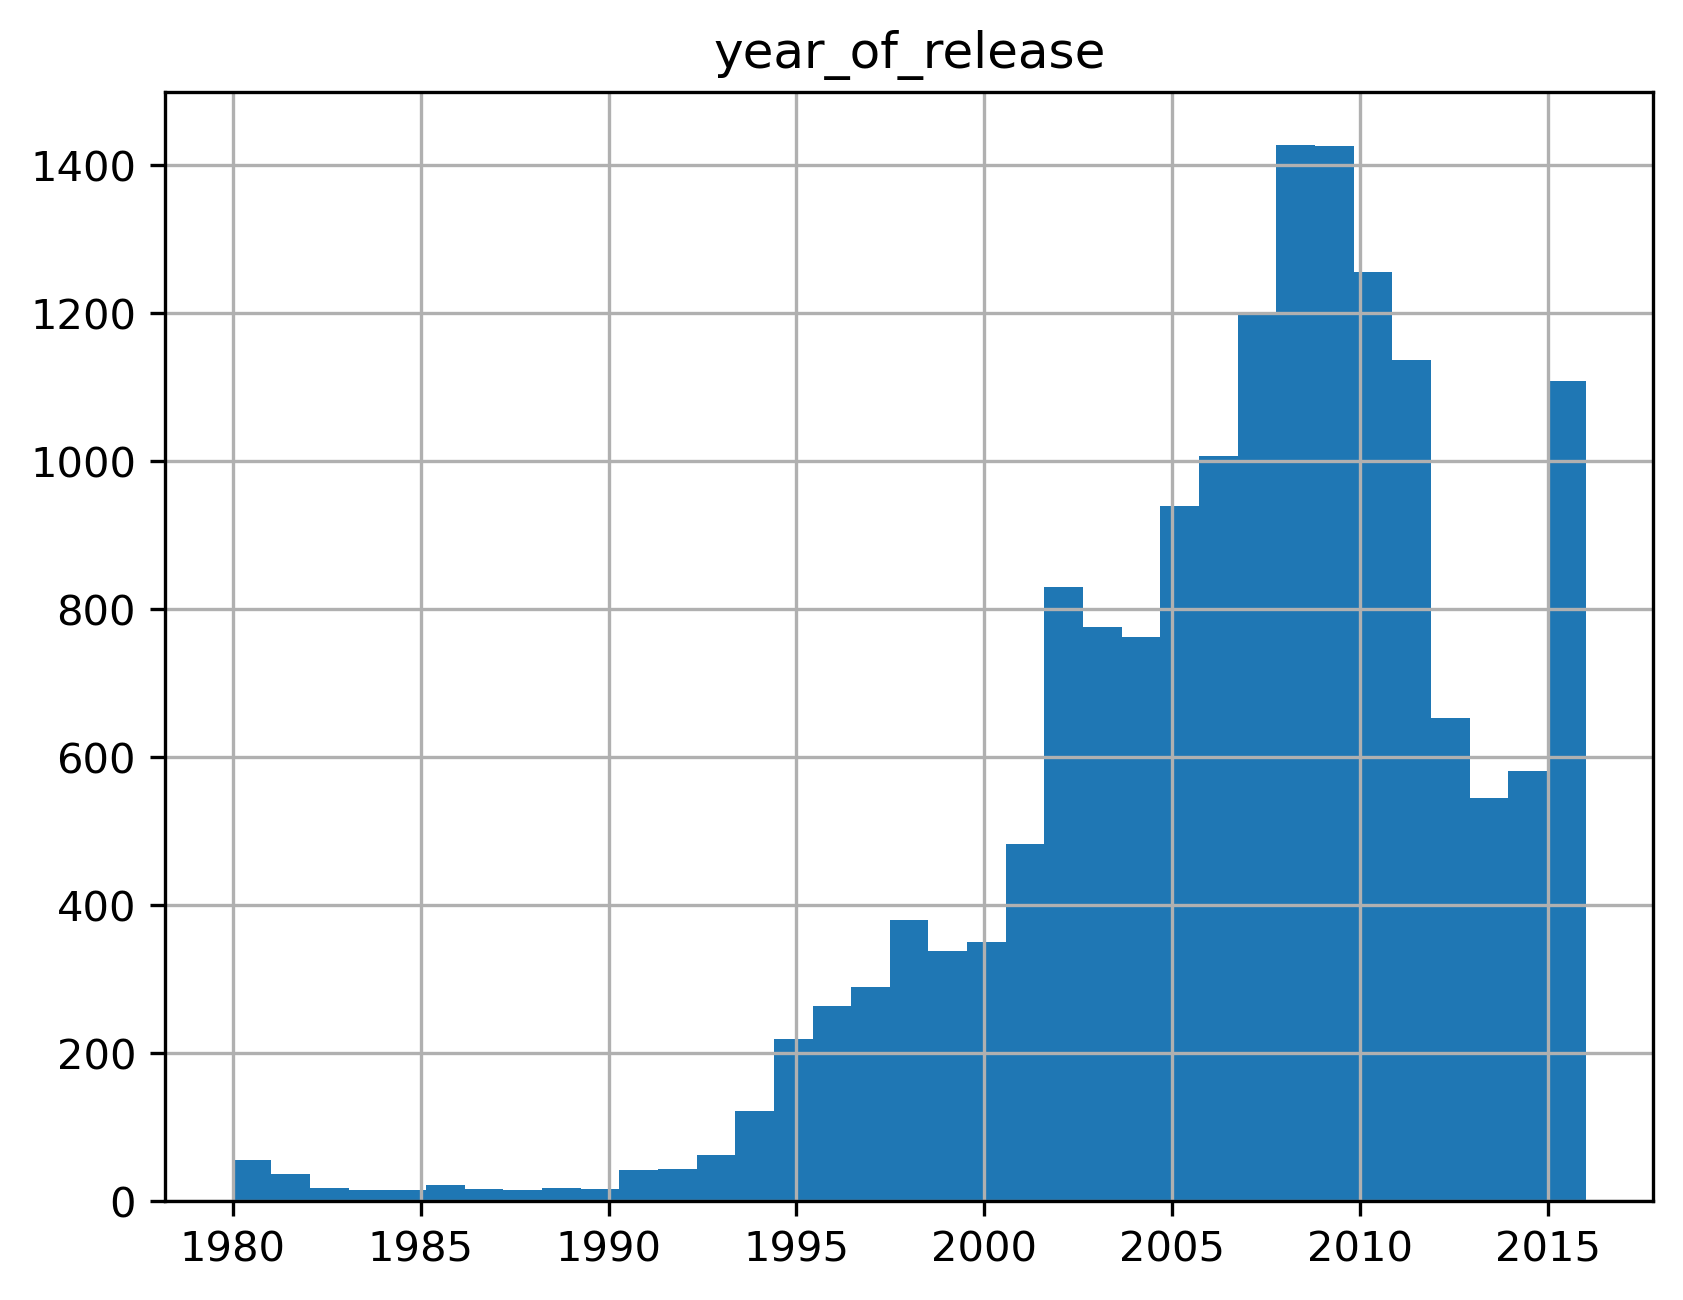

In [20]:
df.hist(column='year_of_release', bins=35);


#### 4. Обработка "genre"



* Изучим значения


In [21]:
investigate_column(df["genre"])

Null or Na count is 2
count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object



* Вывод
	- Обнаруженные аномалии: так же 2 пропущ. значения
	- Причины, по которым они могли возникнуть: ??
	- Как исправлять: оставим как есть
	- Финальный тип и почему: ...



* Изменение



#### 5. Обработка "na_sales"



* Изучим значения


In [22]:
investigate_column(df["na_sales"])

Null or Na count is 0
count    16446.000000
mean         0.264089
std          0.818416
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64



* Вывод
	- Обнаруженные аномалии: ...
	- Причины, по которым они могли возникнуть: ...
	- Как исправлять: ...
	- Финальный тип и почему: ...


In [40]:
df.na_sales

0        41.36
1        29.08
2        15.68
3        15.61
4        11.27
         ...  
16710     0.00
16711     0.00
16712     0.00
16713     0.01
16714     0.00
Name: na_sales, Length: 16446, dtype: float64

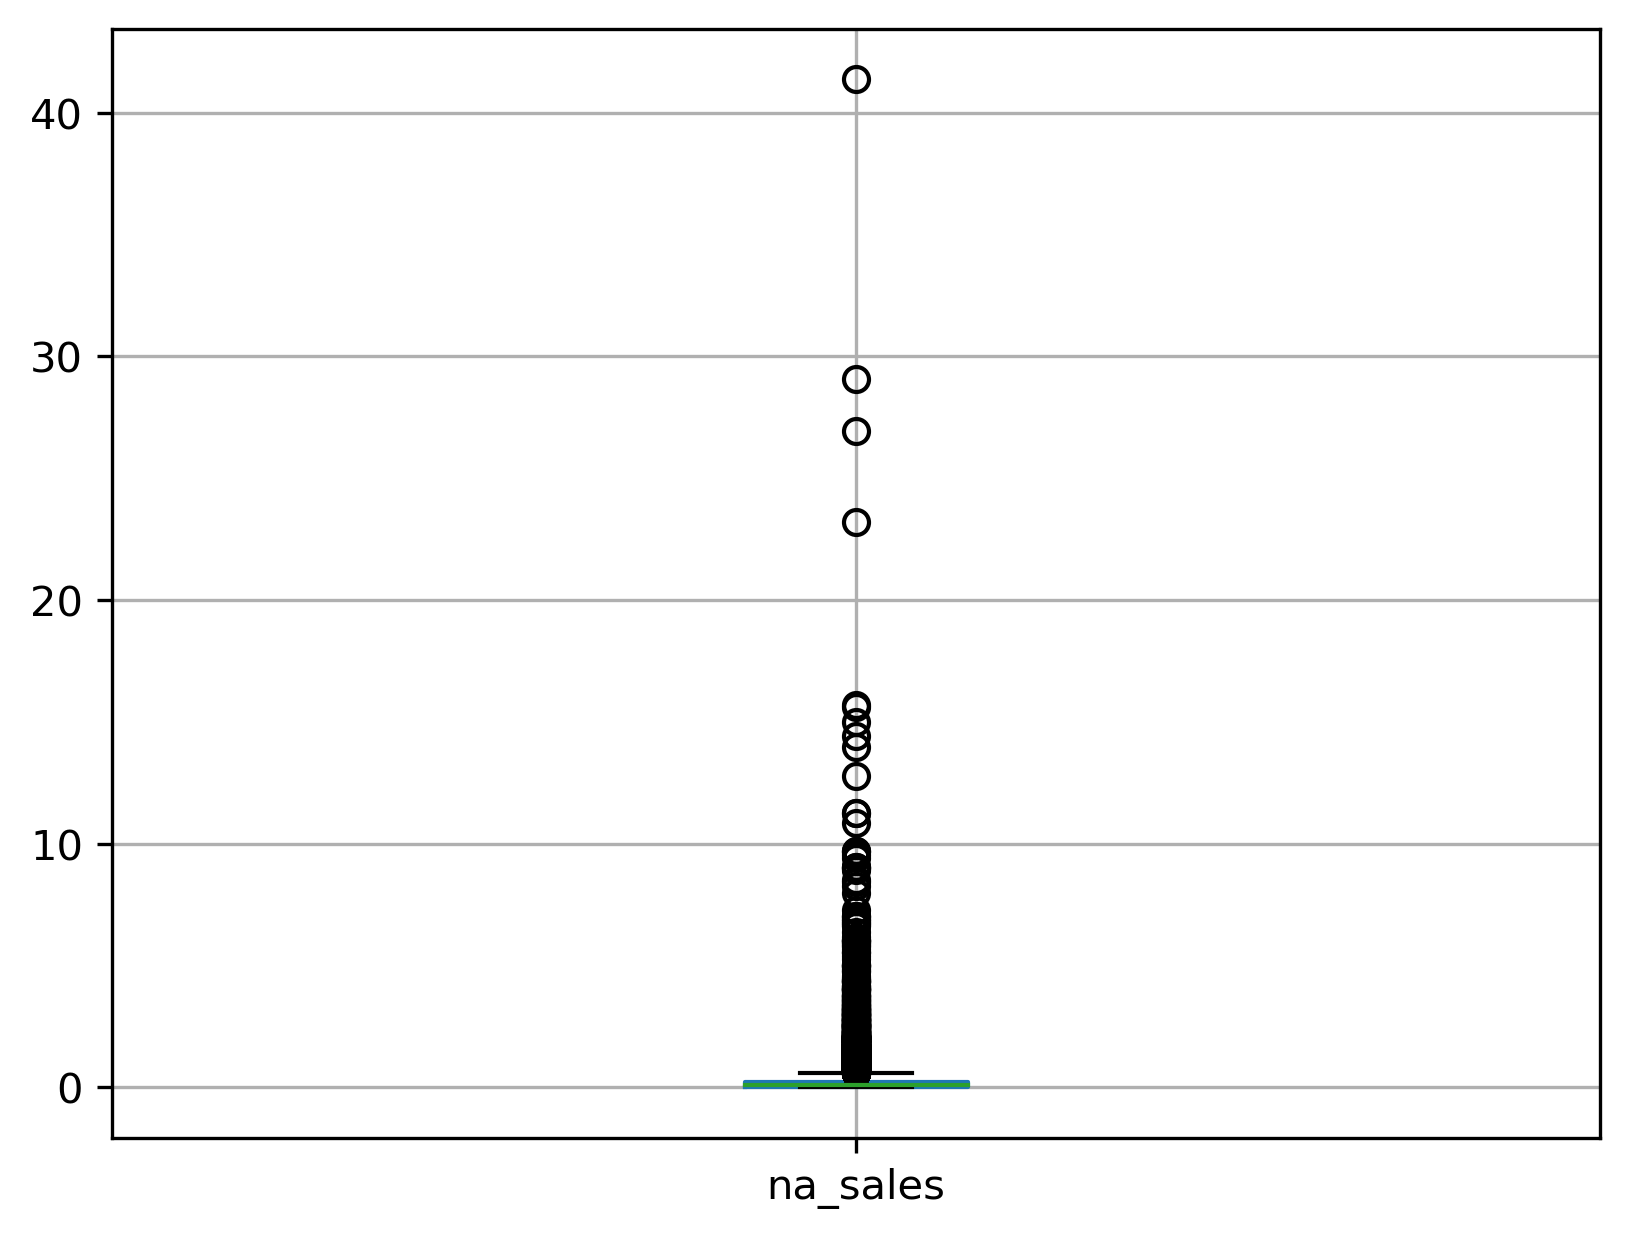

In [23]:
df.boxplot(column='na_sales');


#### 6. Обработка "eu_sales"



* Изучим значения


In [24]:
investigate_column(df["eu_sales"])

Null or Na count is 0
count    16446.000000
mean         0.145945
std          0.506696
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64



#### 7. Обработка "jp_sales"



* Изучим значения


In [25]:
investigate_column(df["jp_sales"])

Null or Na count is 0
count    16446.000000
mean         0.078479
std          0.311082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64



#### 8. Обработка "other_sales"



* Изучим значения


In [26]:
investigate_column(df["other_sales"])

Null or Na count is 0
count    16446.000000
mean         0.047593
std          0.187994
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64



#### 9. Обработка "critic_score"


In [27]:
investigate_column(df["critic_score"])

Null or Na count is 8463
count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64



#### 10. Обработка "user_score"



* Изучим значения


In [28]:
investigate_column(df["user_score"])

Null or Na count is 6607
count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object



* Вывод
	- Обнаруженные аномалии: пропуско около 41%, удалить мы их не можем, так как это сильно исказит данные.
	- Причины, по которым они могли возникнуть: как видим не все пользыватели ставят рейтинги играм
	- Как исправлять: оставим как есть
	- Финальный тип и почему: ...


In [29]:
# #замена строковых значений на заглушку
df["user_score"] = df["user_score"].replace("tbd", -1)

In [30]:
#изменение типа
df["user_score"] = df["user_score"].astype('float')
df['user_score'].dtype

dtype('float64')


#### 11. Обработка "rating"



* Изучим значения


In [31]:
investigate_column(df["rating"])

Null or Na count is 6678
count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object


In [32]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)


* Вывод
	- Обнаруженные аномалии: пропуско около 45%, удалить мы их не можем, так как это сильно исказит данные.
	- Причины, по которым они могли возникнуть: не у всех игр есть рейтинг от орг. ESRB, я предположу что у игры без рейтинга не       выпускались/продавались на территории северной америки
	- Как исправлять: оставим как есть
	- Финальный тип и почему: ...



* Изменение


In [33]:
#Суммарные прожади во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [34]:
#проверка на дубликаты
df.duplicated().sum()

0

### Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [35]:
games_per_year = df['year_of_release'].value_counts().sort_index()


* Изменение


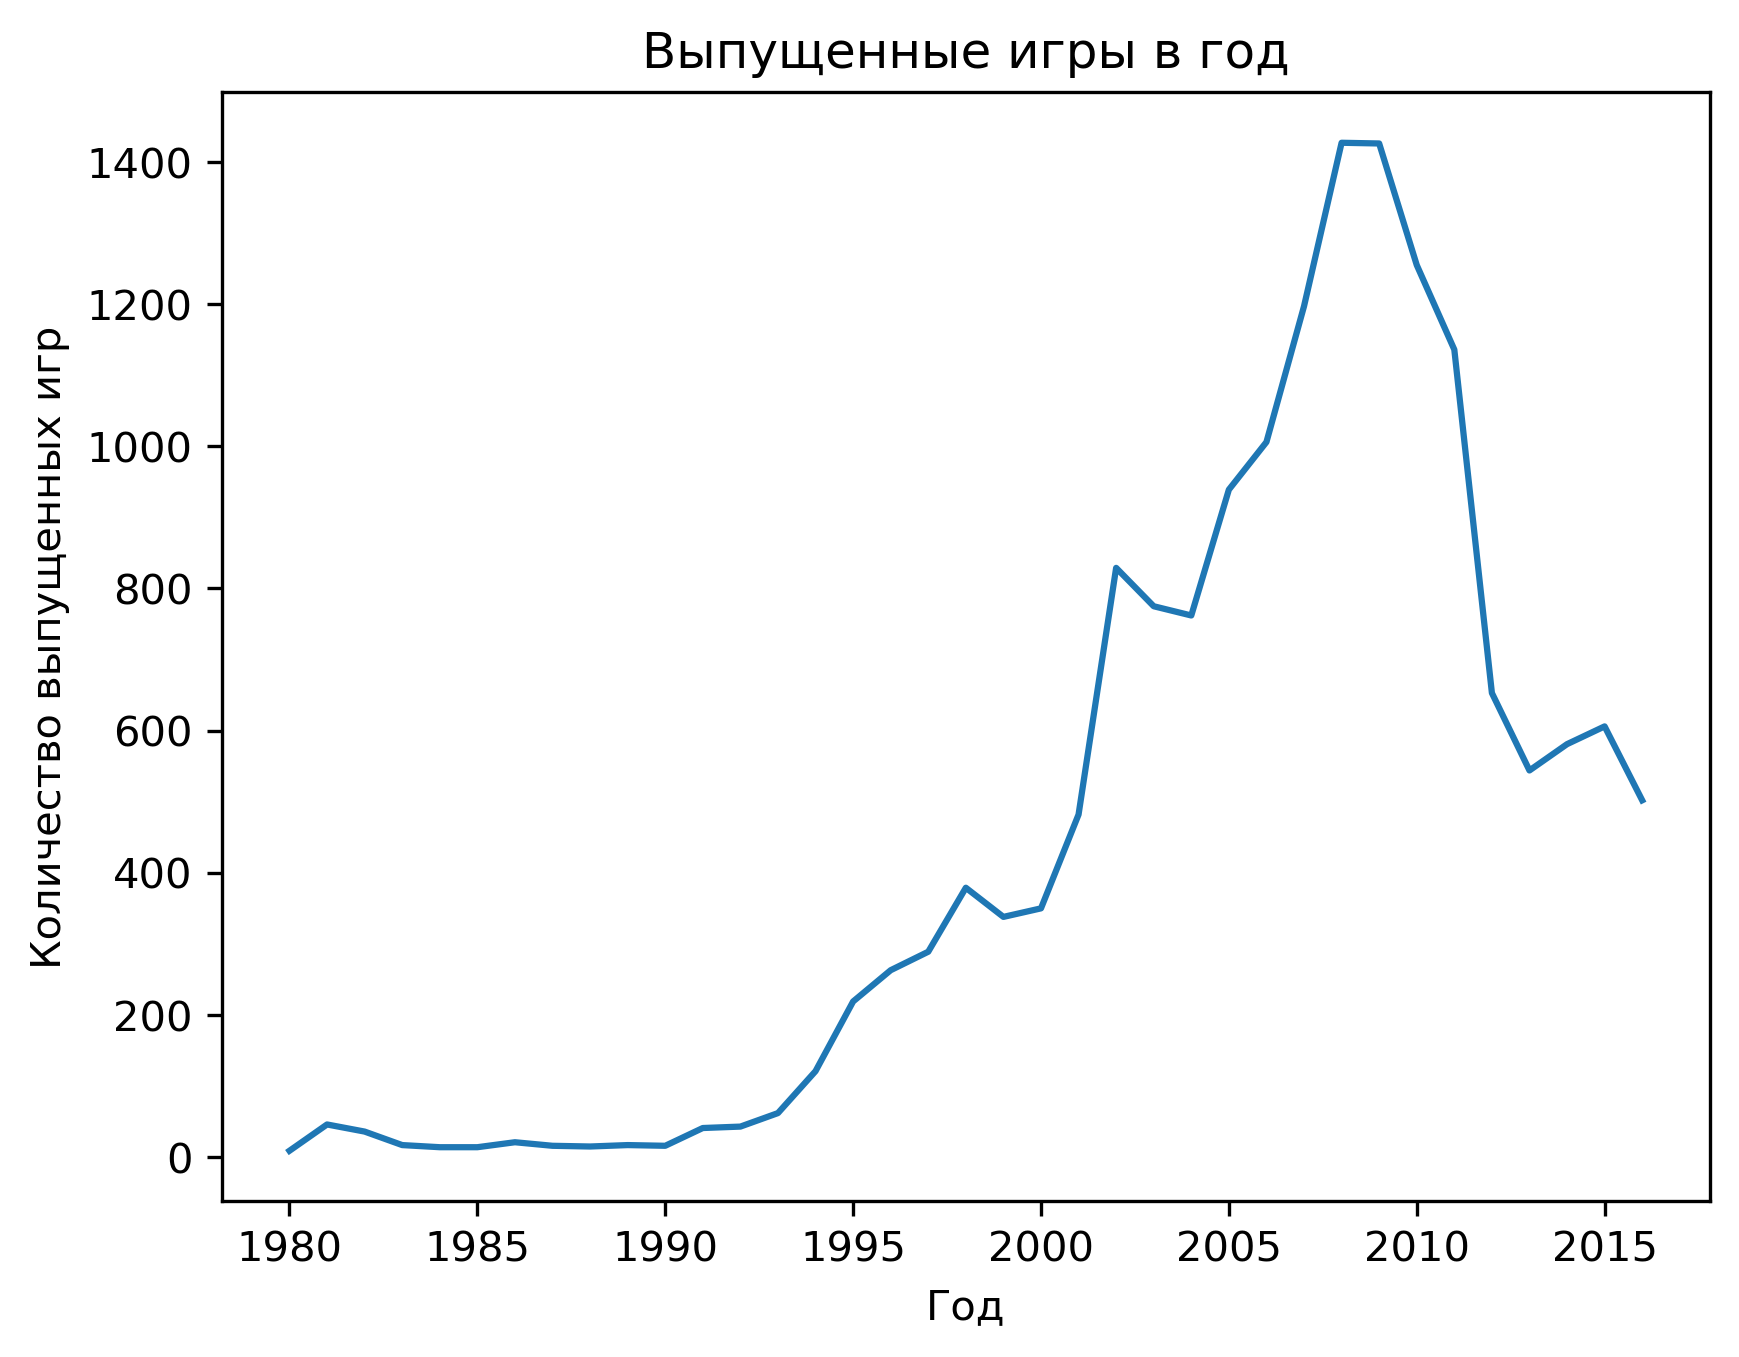

In [36]:
plt.plot(games_per_year.index, games_per_year.values)
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.title("Выпущенные игры в год")
plt.show()

- как видим по графику, количество выпущенных игр растет с каждым годом, с 2000 года рост увиличился в разы, а своего пика достиг в 2008-09 годах. Затем можно наблюдать резкий скачек вниз к уровню 600 единиц как в 2005 году. Данные за все периоды несомненно важны, но если мы будим выявлять более специфические тренды последних лет, то более старые данные до 2000 г можно и не учитывать.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [44]:
#сгруппируем данные по платформам
sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_by_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

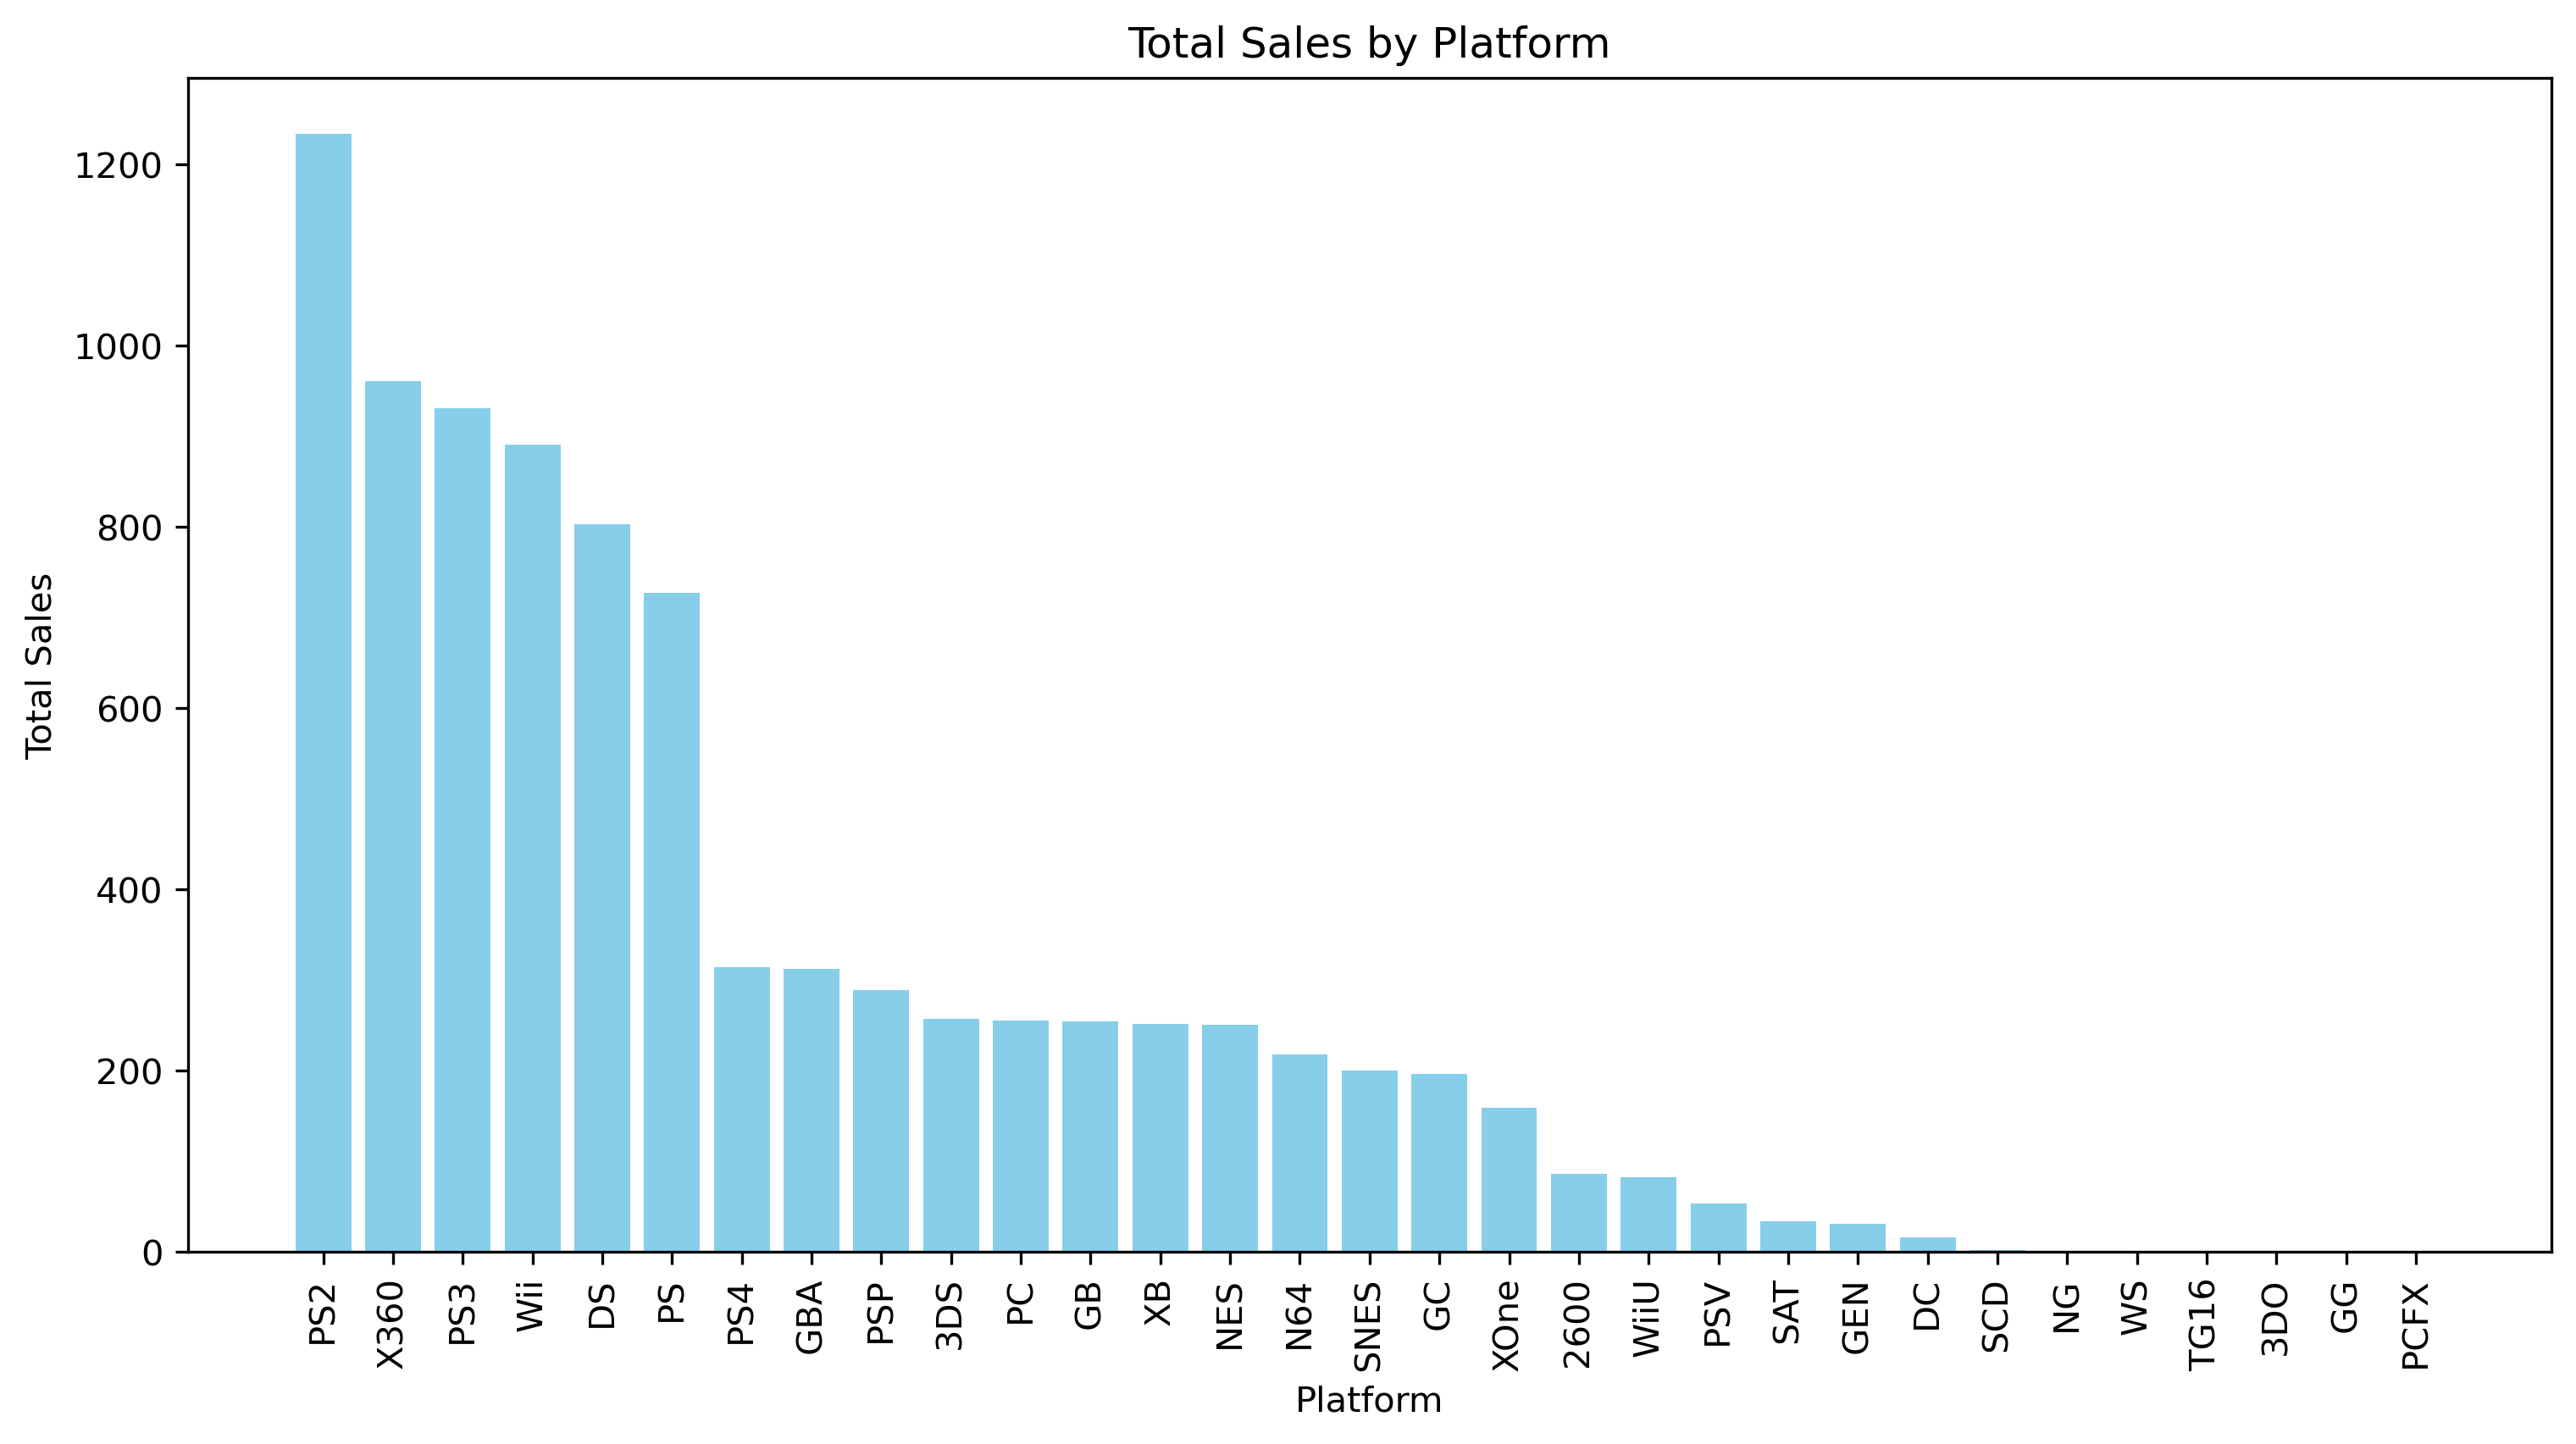

In [46]:
plt.figure(figsize=(12, 6))
plt.bar(sales_by_platform.index, sales_by_platform.values, color='skyblue')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

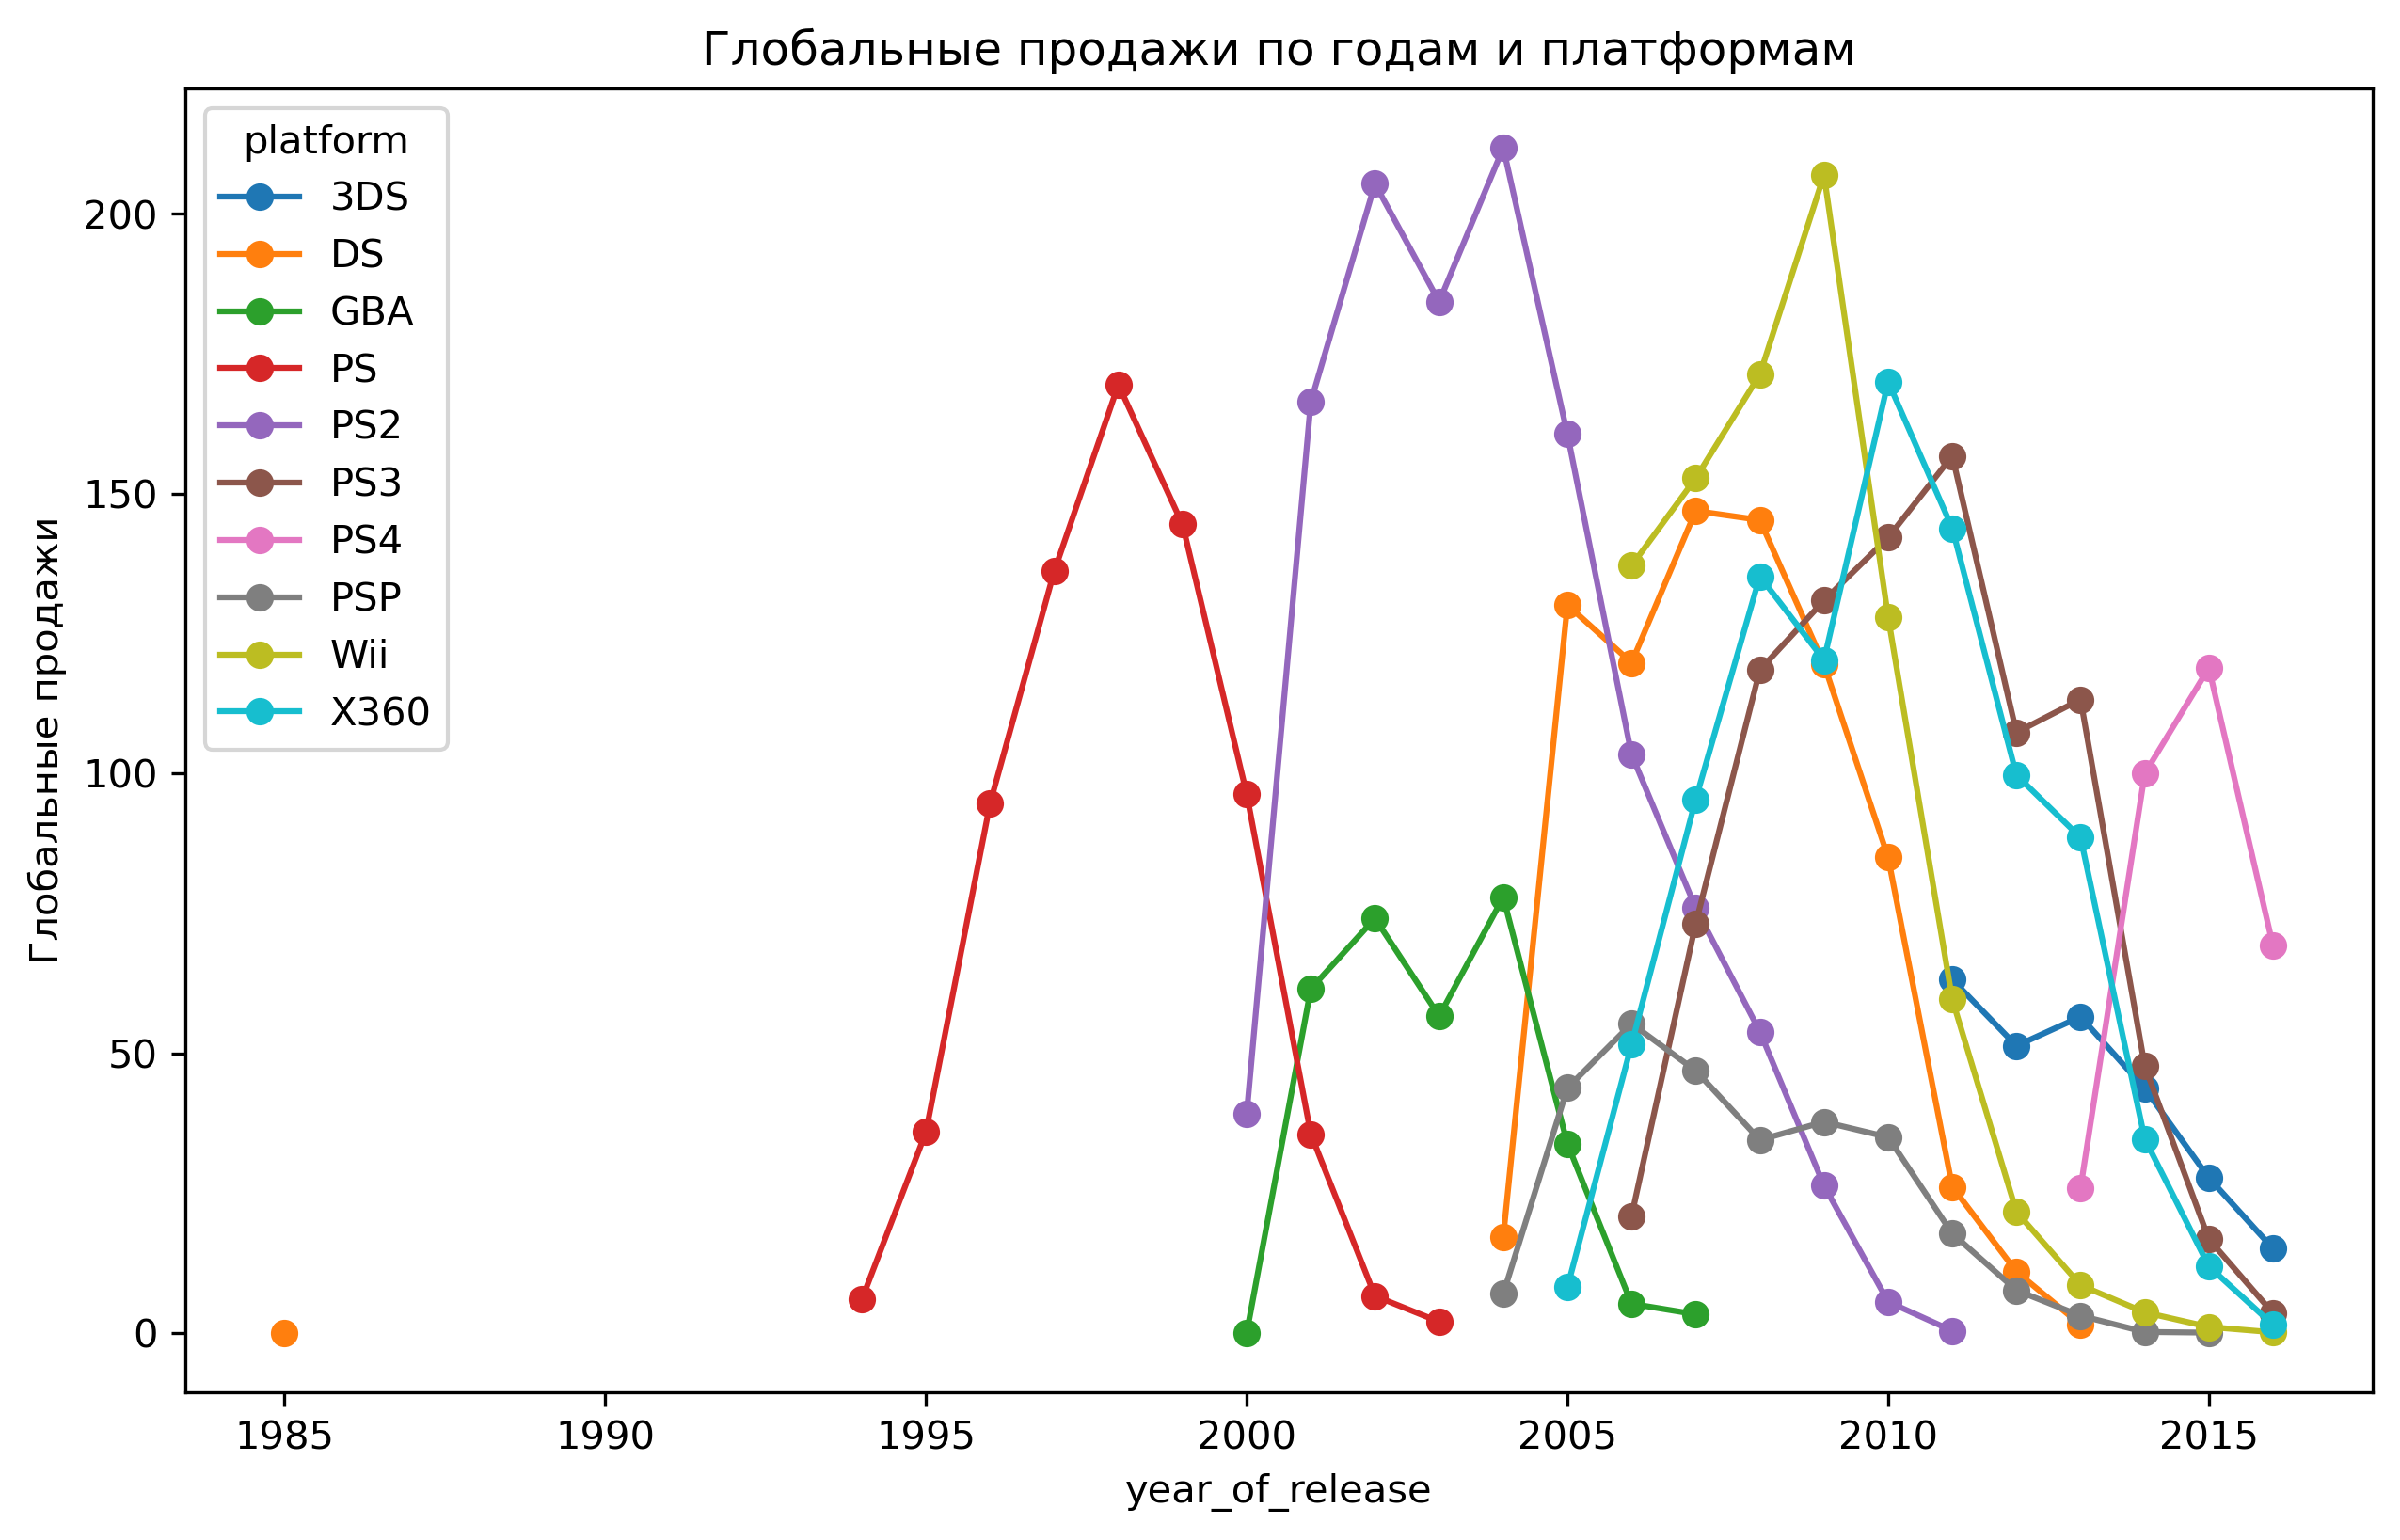

In [47]:
top_platforms = sales_by_platform.head(10).index.tolist()

df_top_platforms = df[df['platform'].isin(top_platforms)]

sales_by_year_platform = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales_by_year_platform.plot(figsize=(10,6), marker='o')
#sales_by_year_platform.plot(figsize=(10,6), linestyle='--')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи по годам и платформам')
plt.show()


- как видими по графику, по популярным платформам в среднем "срок жизни"  составляет около 10 лет. Так же можем наблюдать тренд на снижение срока жизни, тоесть иногда актуальные платформы не доживают и 7 лет.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

In [48]:
#высчитывапм актуальный период
df_actual = df[df['year_of_release'].between(2014, 2016)]

In [49]:
df_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


- Предположу, что актуальный период для нашего анализа данные с 2014 по 2016 г. включительно, это данные  помогут нам построить прогноз на 2017 год

##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [50]:
# Calculate total sales by platform
sales_by_platform = df_actual.groupby('platform')['total_sales'].sum()

# Sort the platforms by total sales
sales_by_platform = sales_by_platform.sort_values(ascending=False)


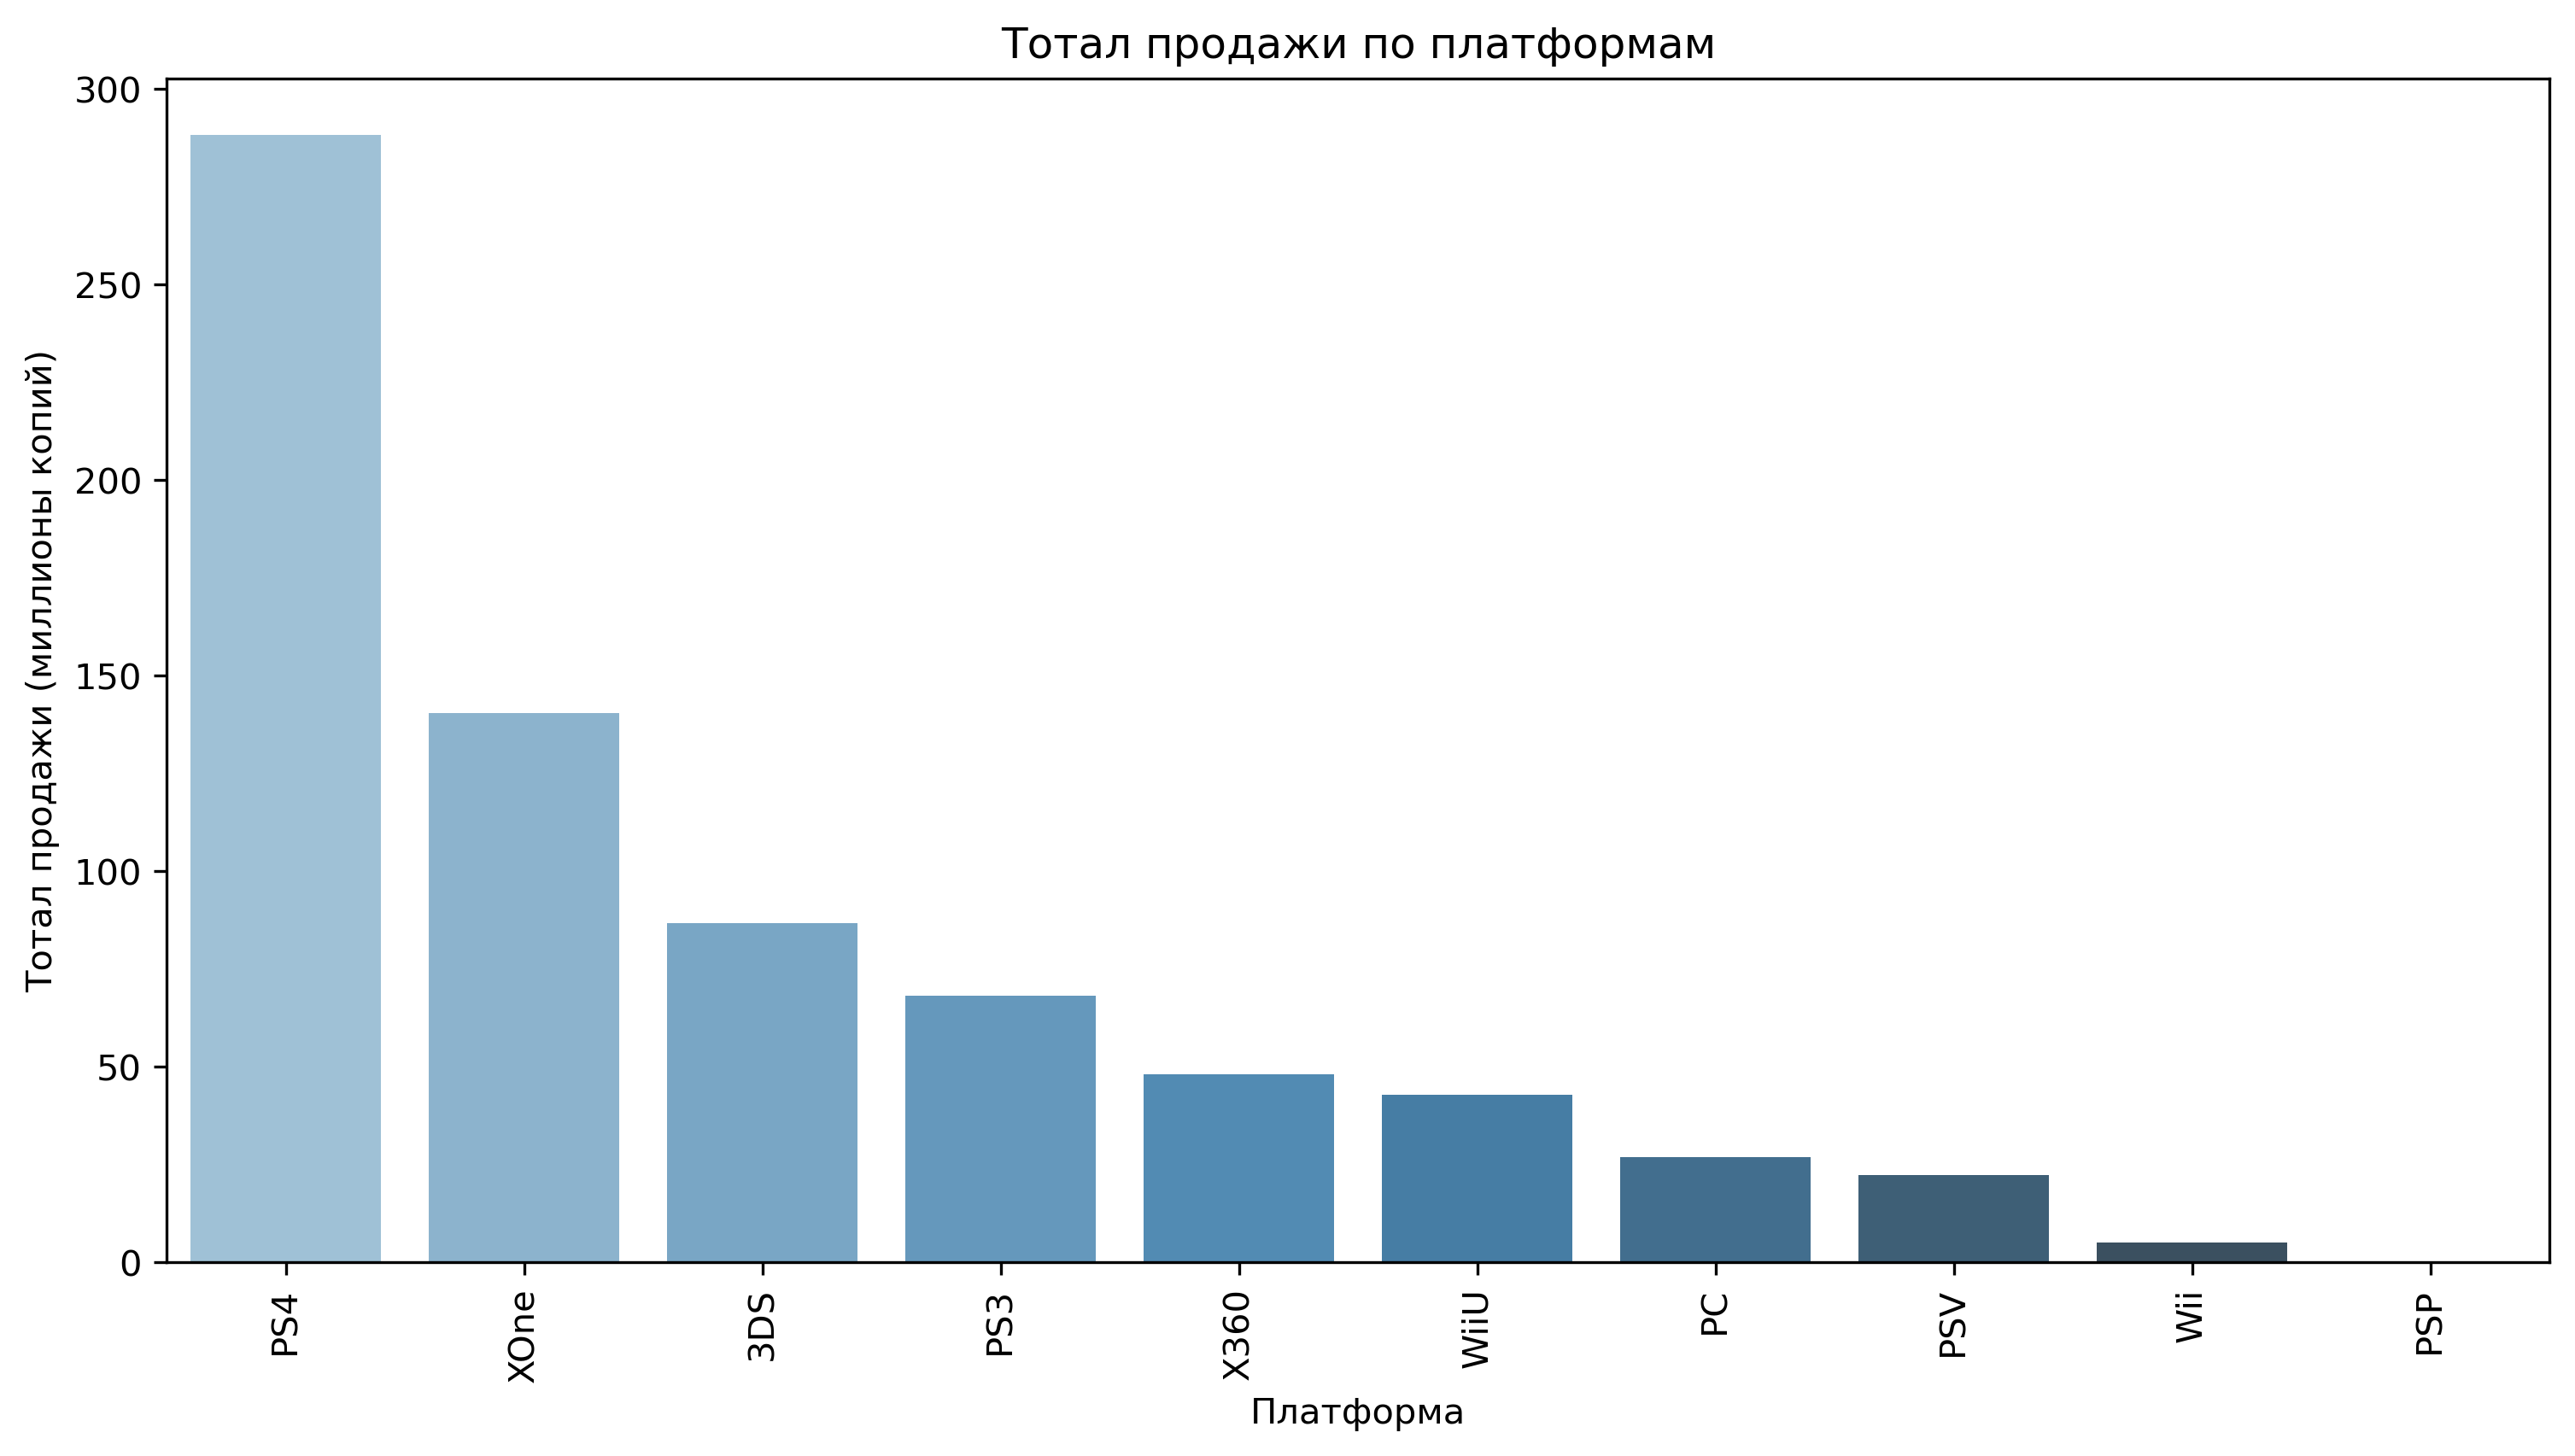

In [51]:
# строит гистограмму по актуальным данным
plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Платформа')
plt.ylabel('Тотал продажи (миллионы копий)')
plt.title('Тотал продажи по платформам')
plt.show()


- по графику видим какие платформы лидируют по прадажам за актуальный период, топ по продажам ps4,ХOne, 3DS.

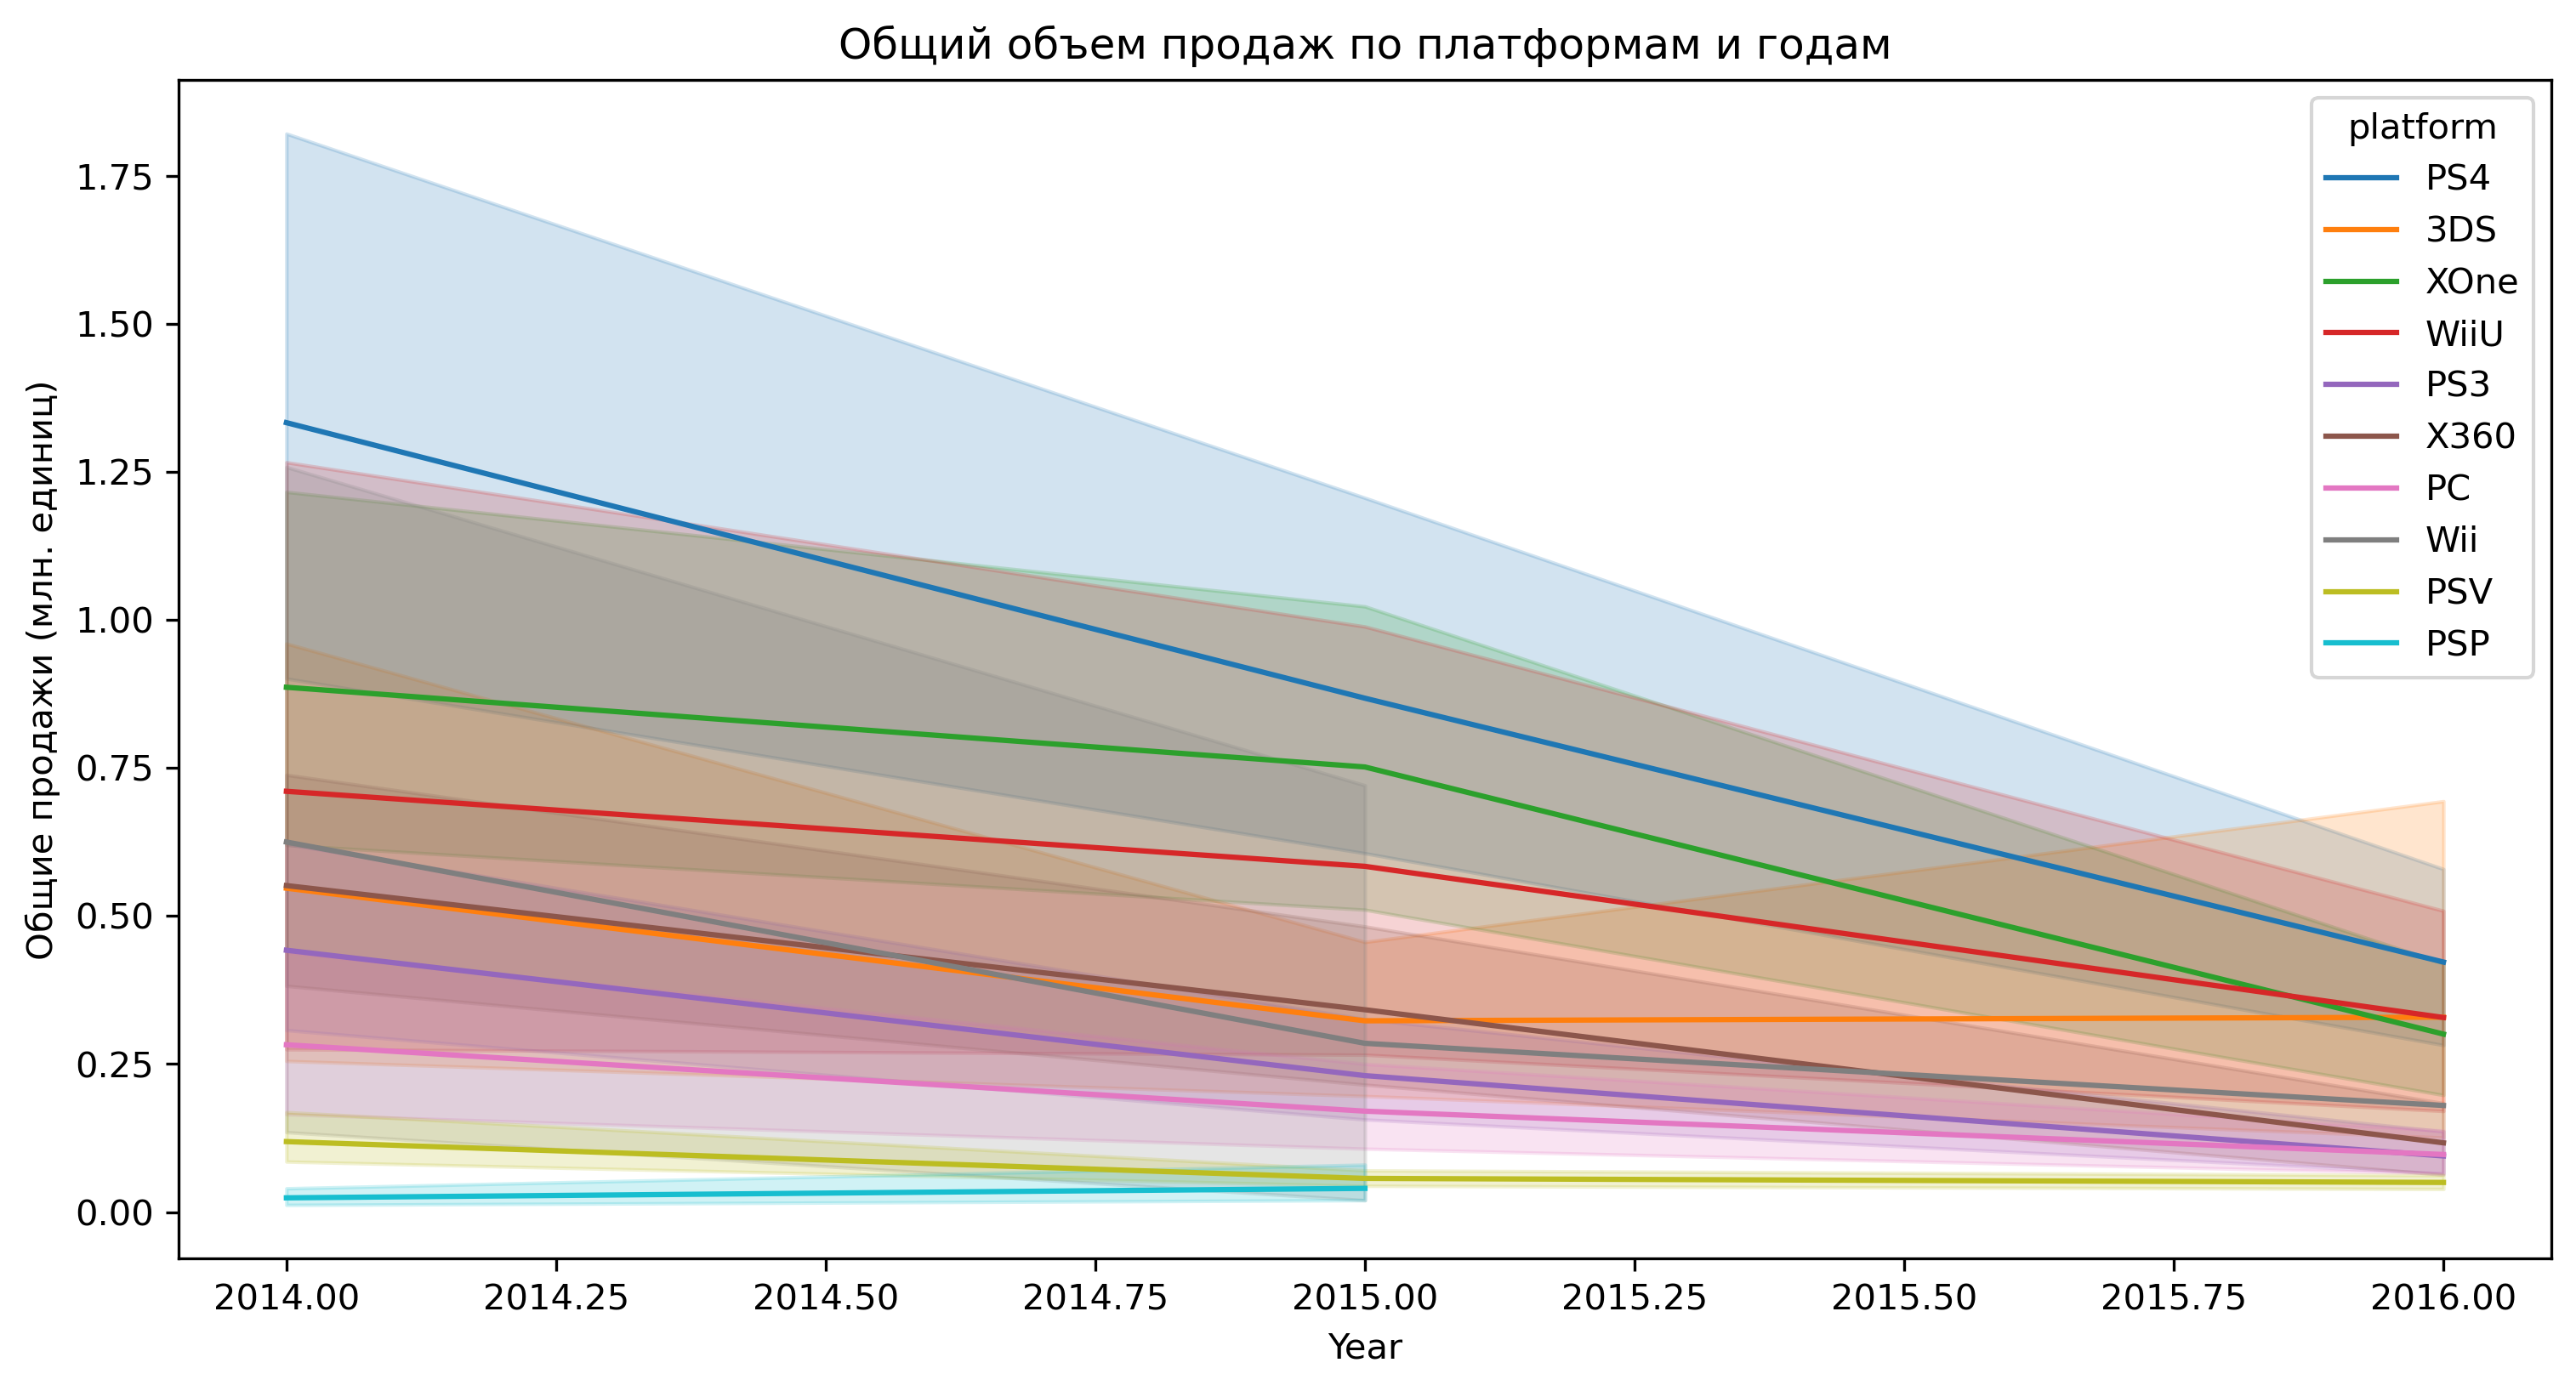

In [52]:
# Create a line plot of sales by platform and year
plt.figure(figsize=(12,6))
sns.lineplot(data=df_actual, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel('Year')
plt.ylabel('Общие продажи (млн. единиц)')
plt.title('Общий объем продаж по платформам и годам')
plt.show()


- по графику видим как менялись продажи по платформы по разным годам. 
- можем наблюдать общее снижение всех платформ. ПС4 вовсе был лидером продаж с момента выхода(15.10.13), когда как Х360 начали покупать меньше как раз с выходом ПС4.
- единственный растущий показатель у 3DS, который начал медленный рост с начала 2015г.
- к потенциально прибыльным я бы отнес ПС4, ХOne, 3DS, WiiU

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [53]:
# Создаем список платформ, которые будем анализировать
platforms = ['PS4', 'PS3', 'XOne', 'X360', 'WiiU', '3DS']

# Создаем новый DataFrame, содержащий данные только по выбранным платформам
df_platforms = df_actual[df_actual['platform'].isin(platforms)]

In [54]:
df_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


<Figure size 3600x2400 with 0 Axes>

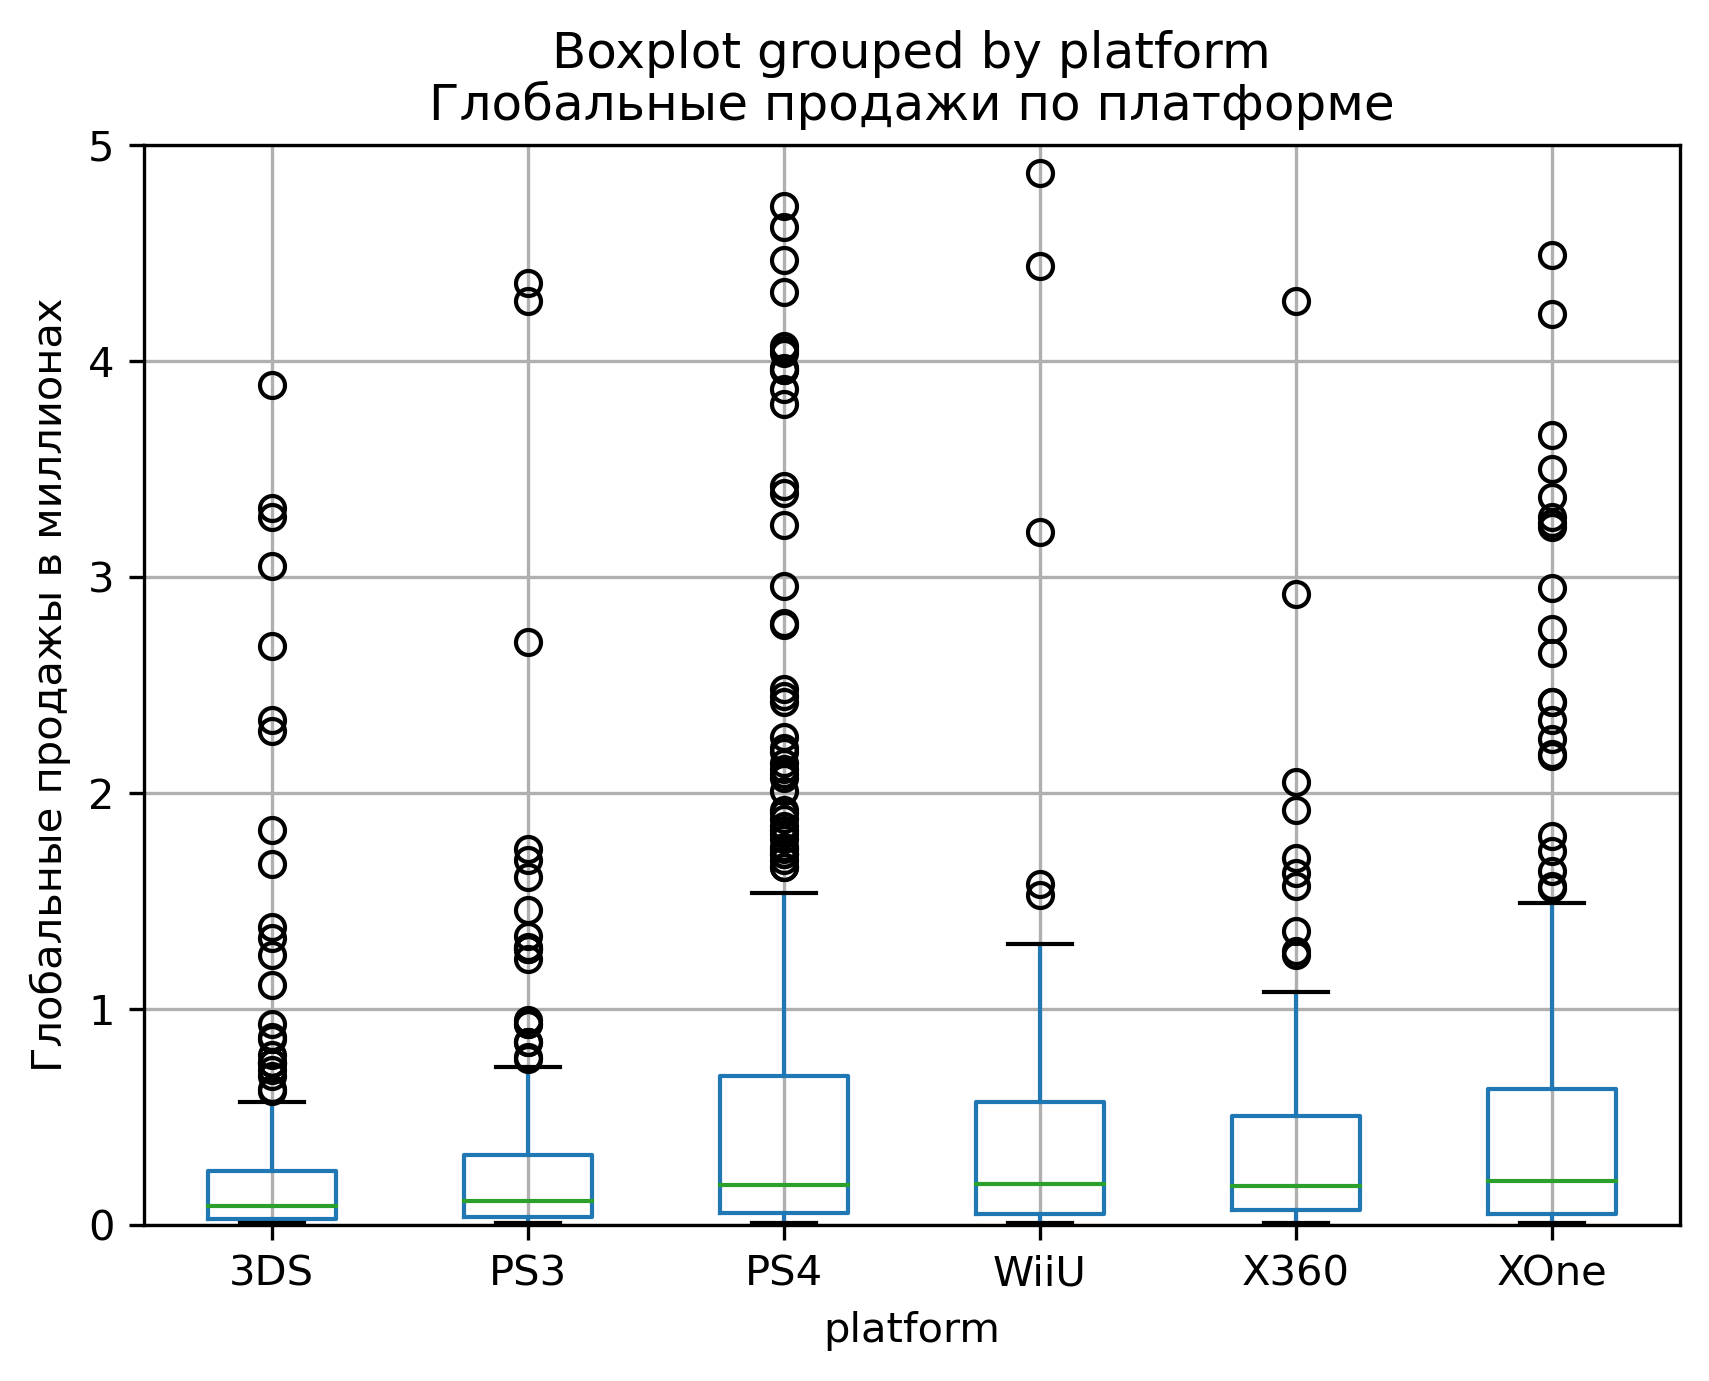

In [55]:
# Строим график
plt.figure(figsize=(12, 8))
df_platforms.boxplot(column='total_sales', by='platform')
plt.title('Глобальные продажи по платформе')
plt.ylim(0, 5)
plt.ylabel('Глобальные продажы в миллионах')
plt.show()

Text(0, 0.5, 'Глобальные продажи')

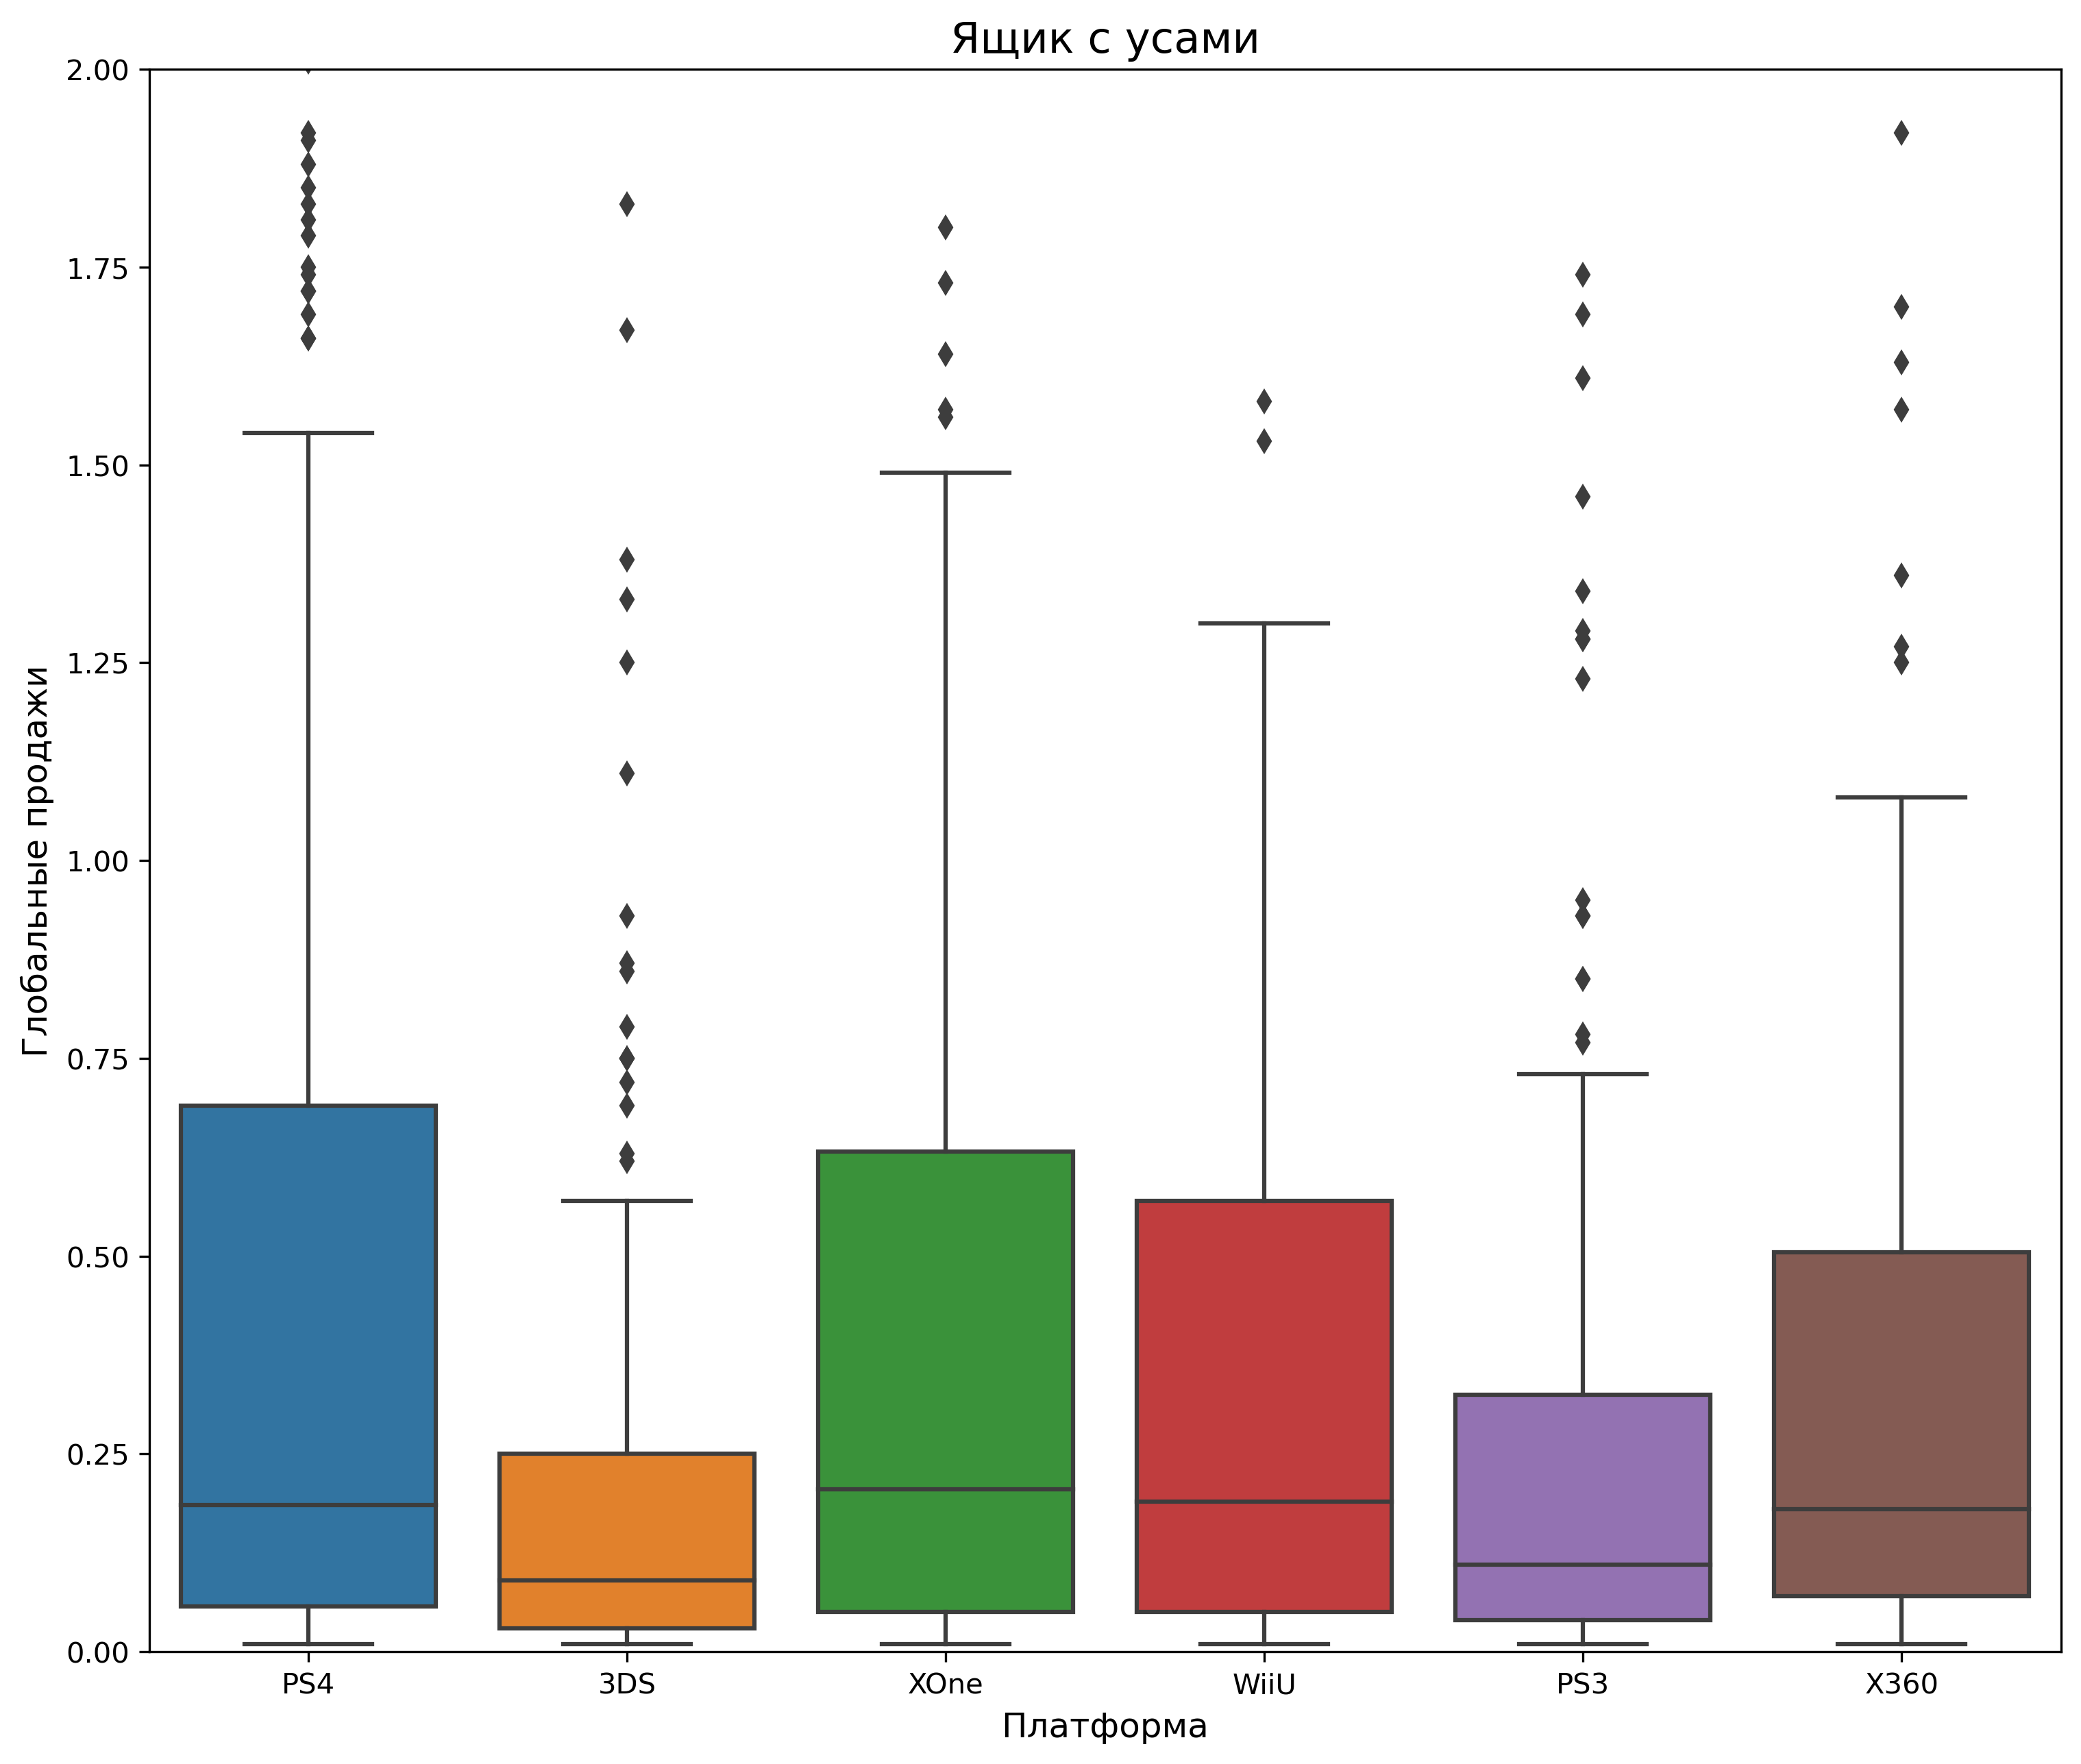

In [56]:
# Строим boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data=df_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 2)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

- На графике мы видим «ящики», в которых содержится основная часть данных, а также «усы», которые выходят за пределы ящика и показывают, какие значения считаются выбросами. Чем длиннее усы, тем более разнообразные значения имеются в выборке.

- Мы можем увидеть, что медиана продаж для всех платформ находится в районе 0.1-0.2 млн. долларов. При этом, медиана продаж игр на PS4 и X360, ХOne и WiiU выше, чем на других платформах. На графике мы также видим, что продажи на PS4, ХOne и WiiU имеют более длинные «усы», что может свидетельствовать о том, что у этих платформ больше успешных игр с высокими продажами.

- Также мы можем заметить, что продажи на PS3 и X360, ХOne снижаются, что может говорить о том, что эти платформы находятся на закате своего жизненного цикла.

- Исходя из этого, можно предположить, что потенциально прибыльными платформами являются PS4 и XOne, WiiU так как на них сосредоточено больше успешных игр и медиана продаж выше, чем на других платформах.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [57]:
df_ps4 = df_actual.loc[(df_actual['platform'] == 'PS4') & (df_actual['critic_score'] > 0)]

In [58]:
df_ps4 = df_actual.loc[(df_actual['platform'] == 'PS4') & (df_actual['user_score'] > 0)]

In [59]:
df_ps4 = df_ps4[['critic_score', 'user_score', 'total_sales']]

In [60]:
df_ps4

,critic_score,user_score,total_sales
42,97.0,8.3,12.62
77,82.0,4.3,8.58
92,83.0,5.7,7.66
94,85.0,5.0,7.60
105,87.0,6.5,7.17
...,...,...,...
16486,42.0,2.3,0.01
16499,70.0,6.8,0.01
16500,69.0,7.5,0.01
16526,61.0,7.9,0.01


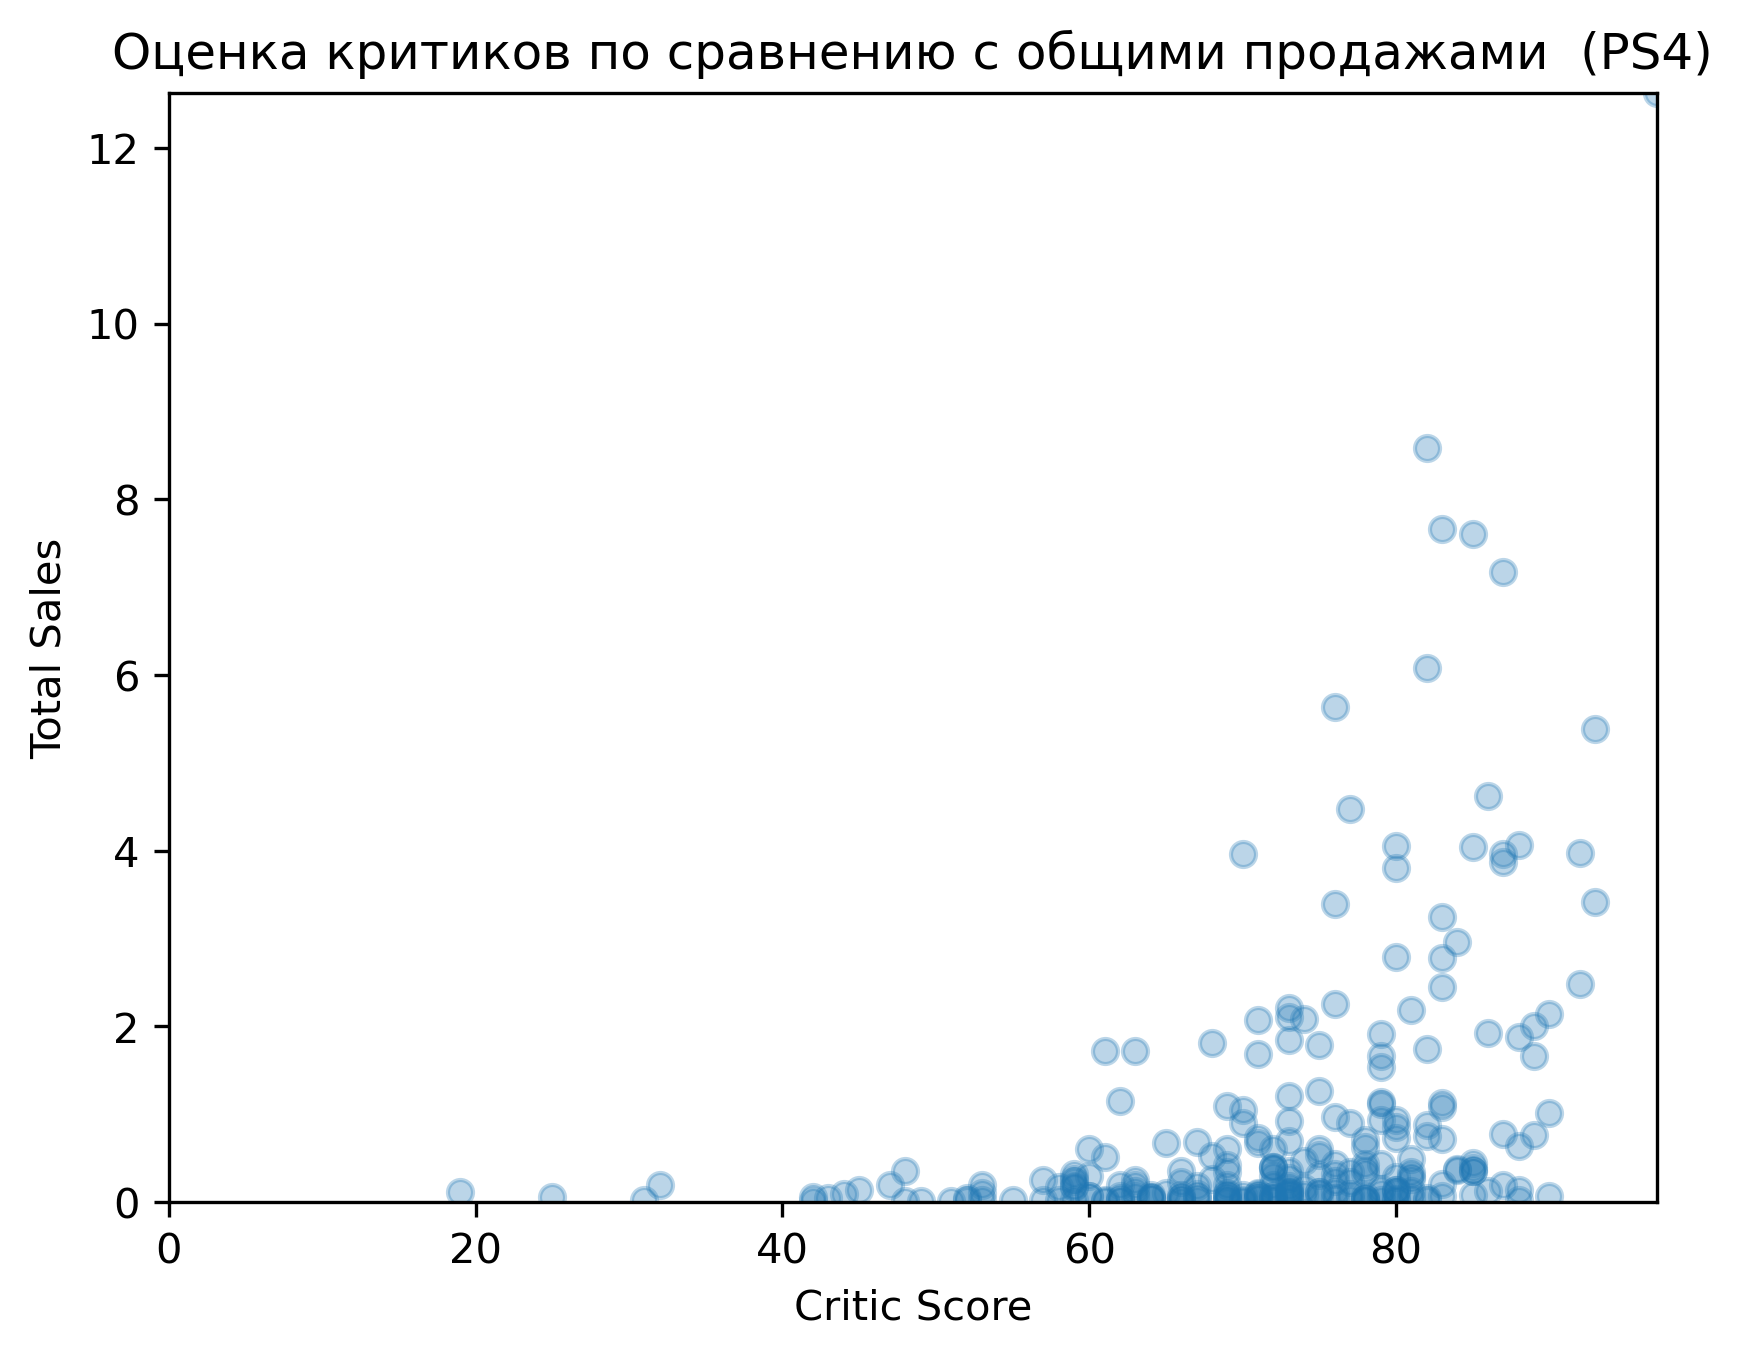

In [61]:
# строим диаграмму рассеяния для critic_score
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.3)
plt.title('Оценка критиков по сравнению с общими продажами  ({})'.format('PS4'))
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.ylim(0, df_ps4['total_sales'].max())
plt.xlim(0, df_ps4['critic_score'].max())
#plt.plot(np.unique(df_ps4['critic_score']), np.poly1d(np.polyfit(df_ps4['critic_score'], df_ps4['total_sales'], 1))(np.unique(df_ps4['critic_score'])), color='red')
plt.show()

- как видим по графику после 50 наблюдам взбросы, так же большинство значений от 60 до 85 сосредоточено около 0,2-0,3
- в целом можно наблюдать общий рост, то-есть чем выше оценка, тем выше и продоваемость

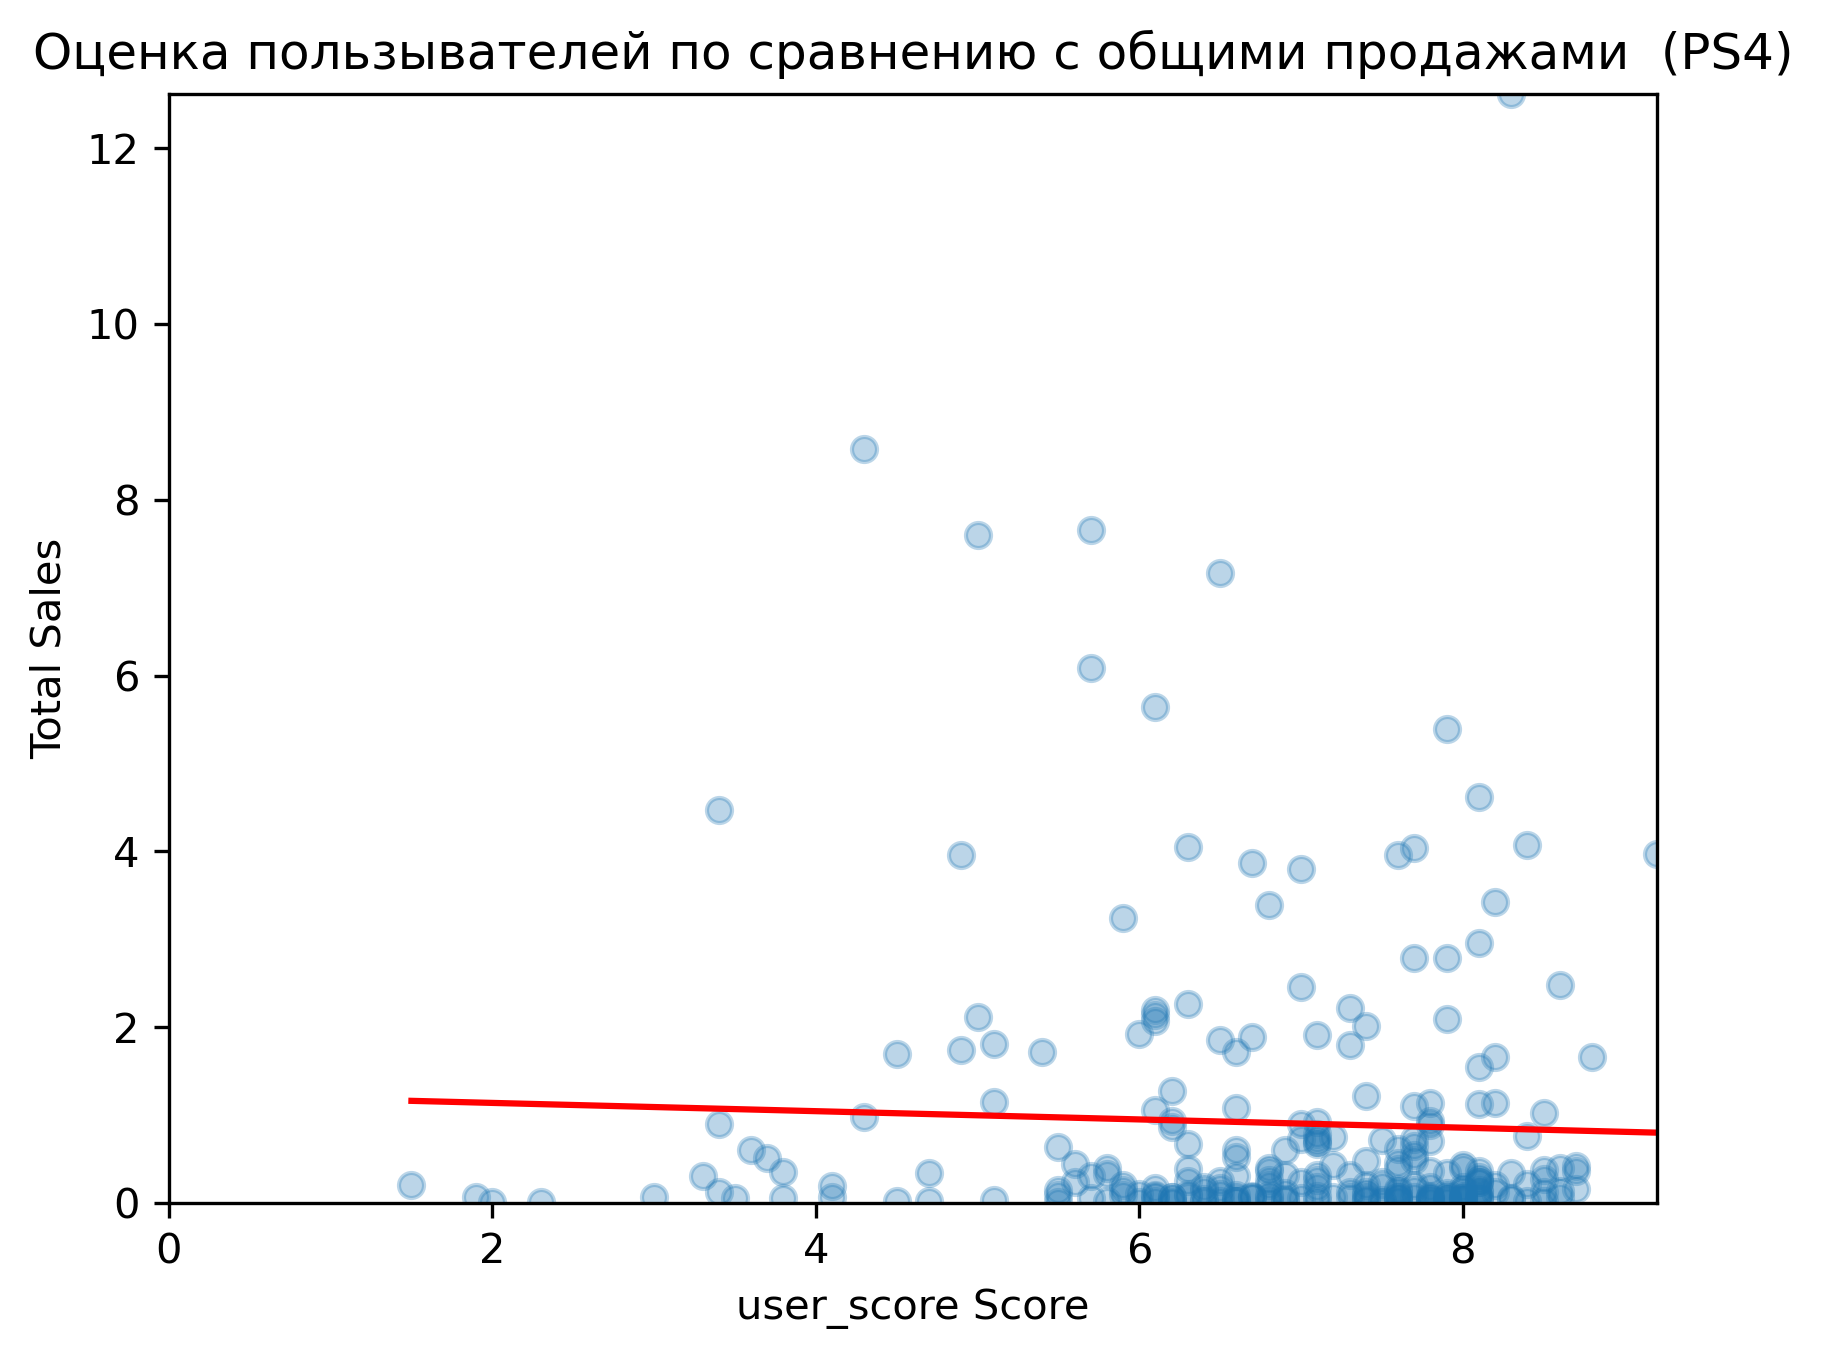

In [62]:
# строим диаграмму рассеяния для user_score
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.3)
plt.title('Оценка пользывателей по сравнению с общими продажами  ({})'.format('PS4'))
plt.xlabel('user_score Score')
plt.ylabel('Total Sales')
plt.ylim(0, df_ps4['total_sales'].max())
plt.xlim(0, df_ps4['user_score'].max())
plt.plot(np.unique(df_ps4['user_score']), np.poly1d(np.polyfit(df_ps4['user_score'], df_ps4['total_sales'], 1))(np.unique(df_ps4['user_score'])), color='red')
plt.show()

- по графику так же наблюдаем взбросы значений, большинство расположено в районе 0,2-0,3 с оценкой 6-8
- тут уже видим общий тренд на снижение,едва заметный, несмотря на высокую оценку пользывателей

#### Соотнесите выводы с продажами игр на других платформах.

In [63]:
df_XOne = df_actual.loc[(df_actual['platform'] == 'XOne') & (df_actual['critic_score'] > 0)]

In [69]:
df_XOne = df_actual.loc[(df_actual['platform'] == 'XOne') & (df_actual['user_score'] > 0)]


In [70]:
df_XOne = df_XOne[['critic_score', 'user_score', 'total_sales']]

In [71]:
df_XOne

,critic_score,user_score,total_sales
165,97.0,7.9,5.47
179,81.0,5.4,5.26
242,84.0,6.4,4.49
270,88.0,6.2,4.22
373,72.0,4.1,3.50
...,...,...,...
16544,NaN,6.8,0.01
16597,65.0,6.0,0.01
16630,63.0,8.2,0.01
16643,NaN,6.6,0.01


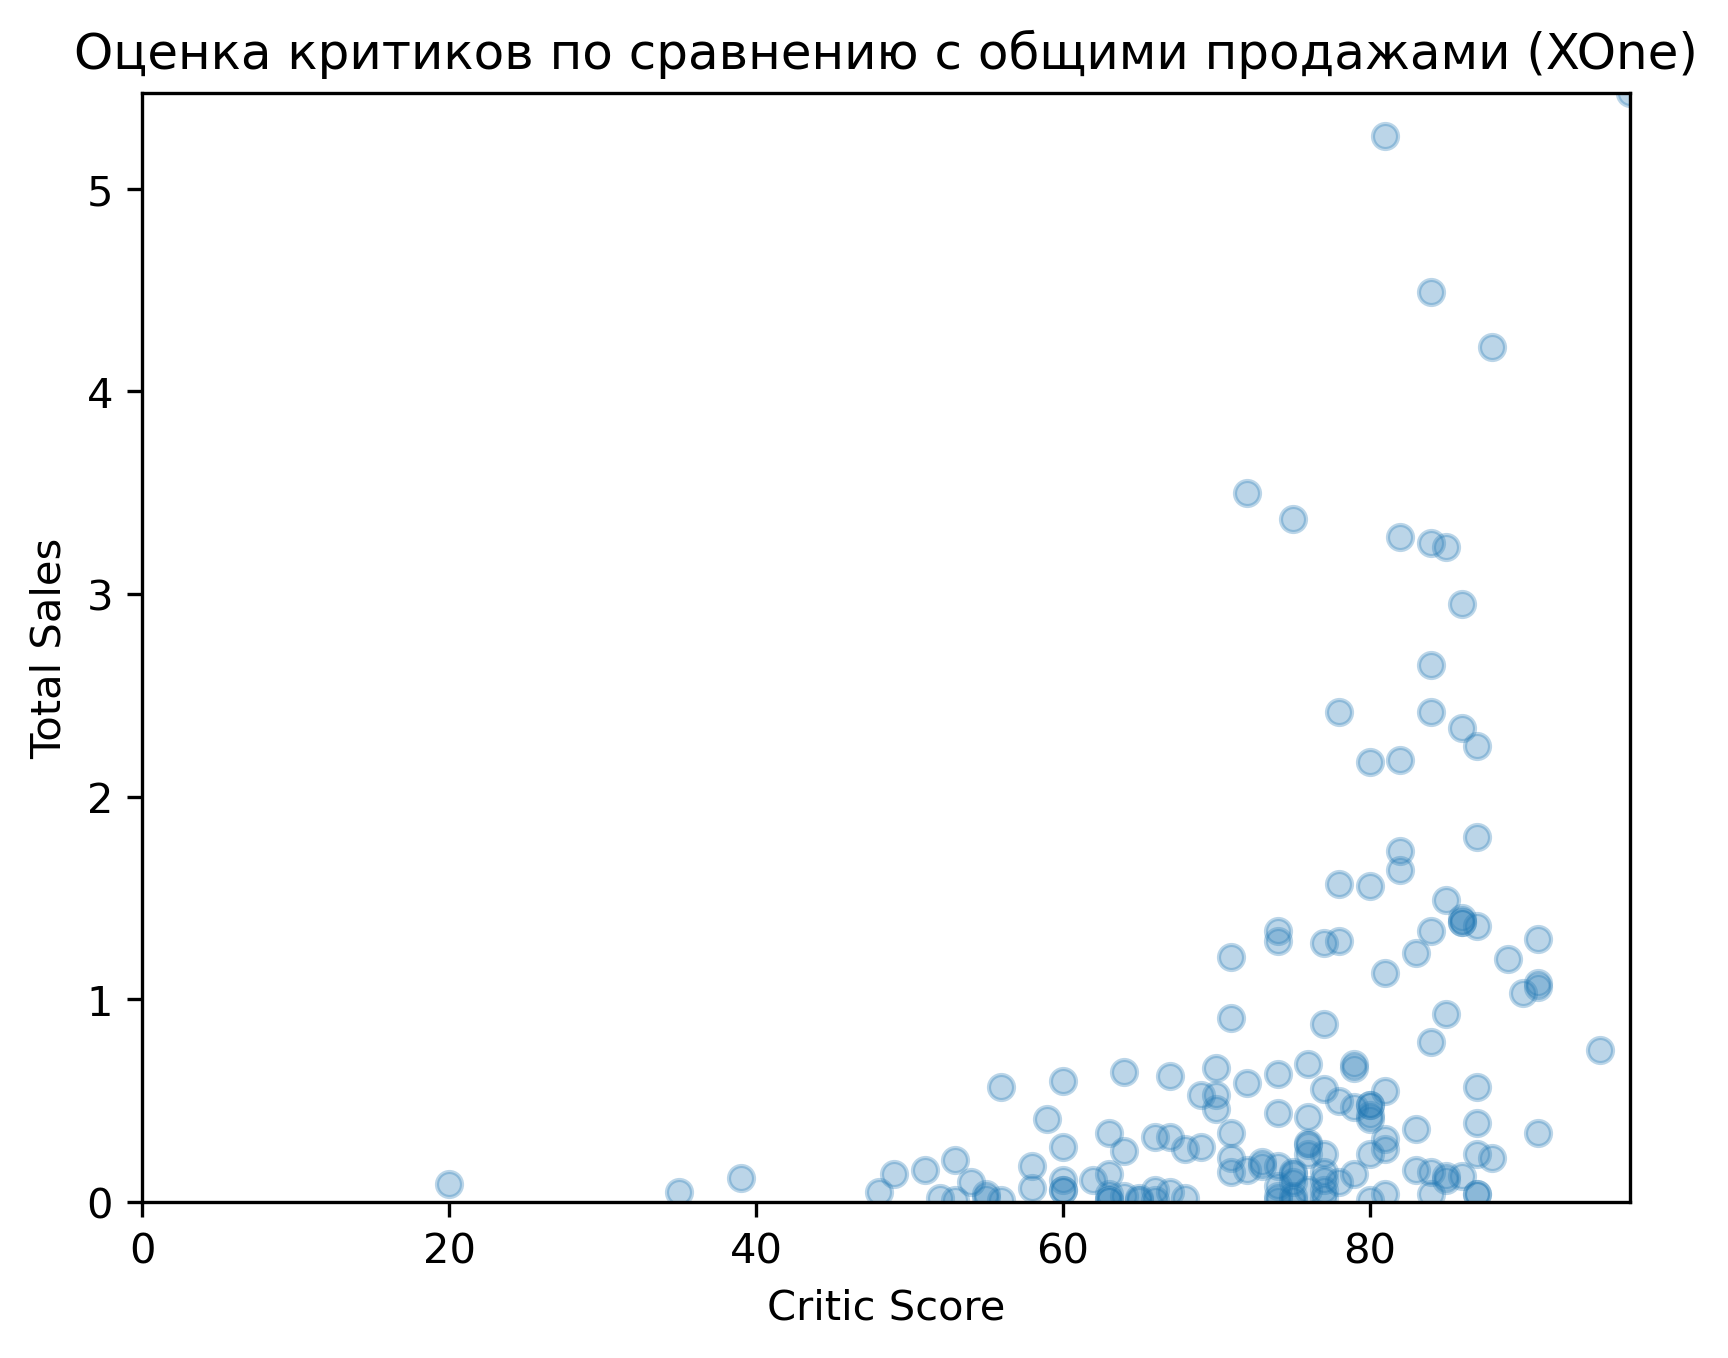

In [72]:
# строим диаграмму рассеяния для critic_score
plt.scatter(df_XOne['critic_score'], df_XOne['total_sales'], alpha=0.3)
plt.title('Оценка критиков по сравнению с общими продажами ({})'.format('XOne'))
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.ylim(0, df_XOne['total_sales'].max())
plt.xlim(0, df_XOne['critic_score'].max())
#plt.plot(np.unique(df_XOne['critic_score']), np.poly1d(np.polyfit(df_XOne['critic_score'], df_XOne['total_sales'], 1))(np.unique(df_XOne['critic_score'])), color='red')
plt.show()

- тут уже более явно видим что оценка критиков сильно влияют на продажи
- особенно больше всего значений после 60

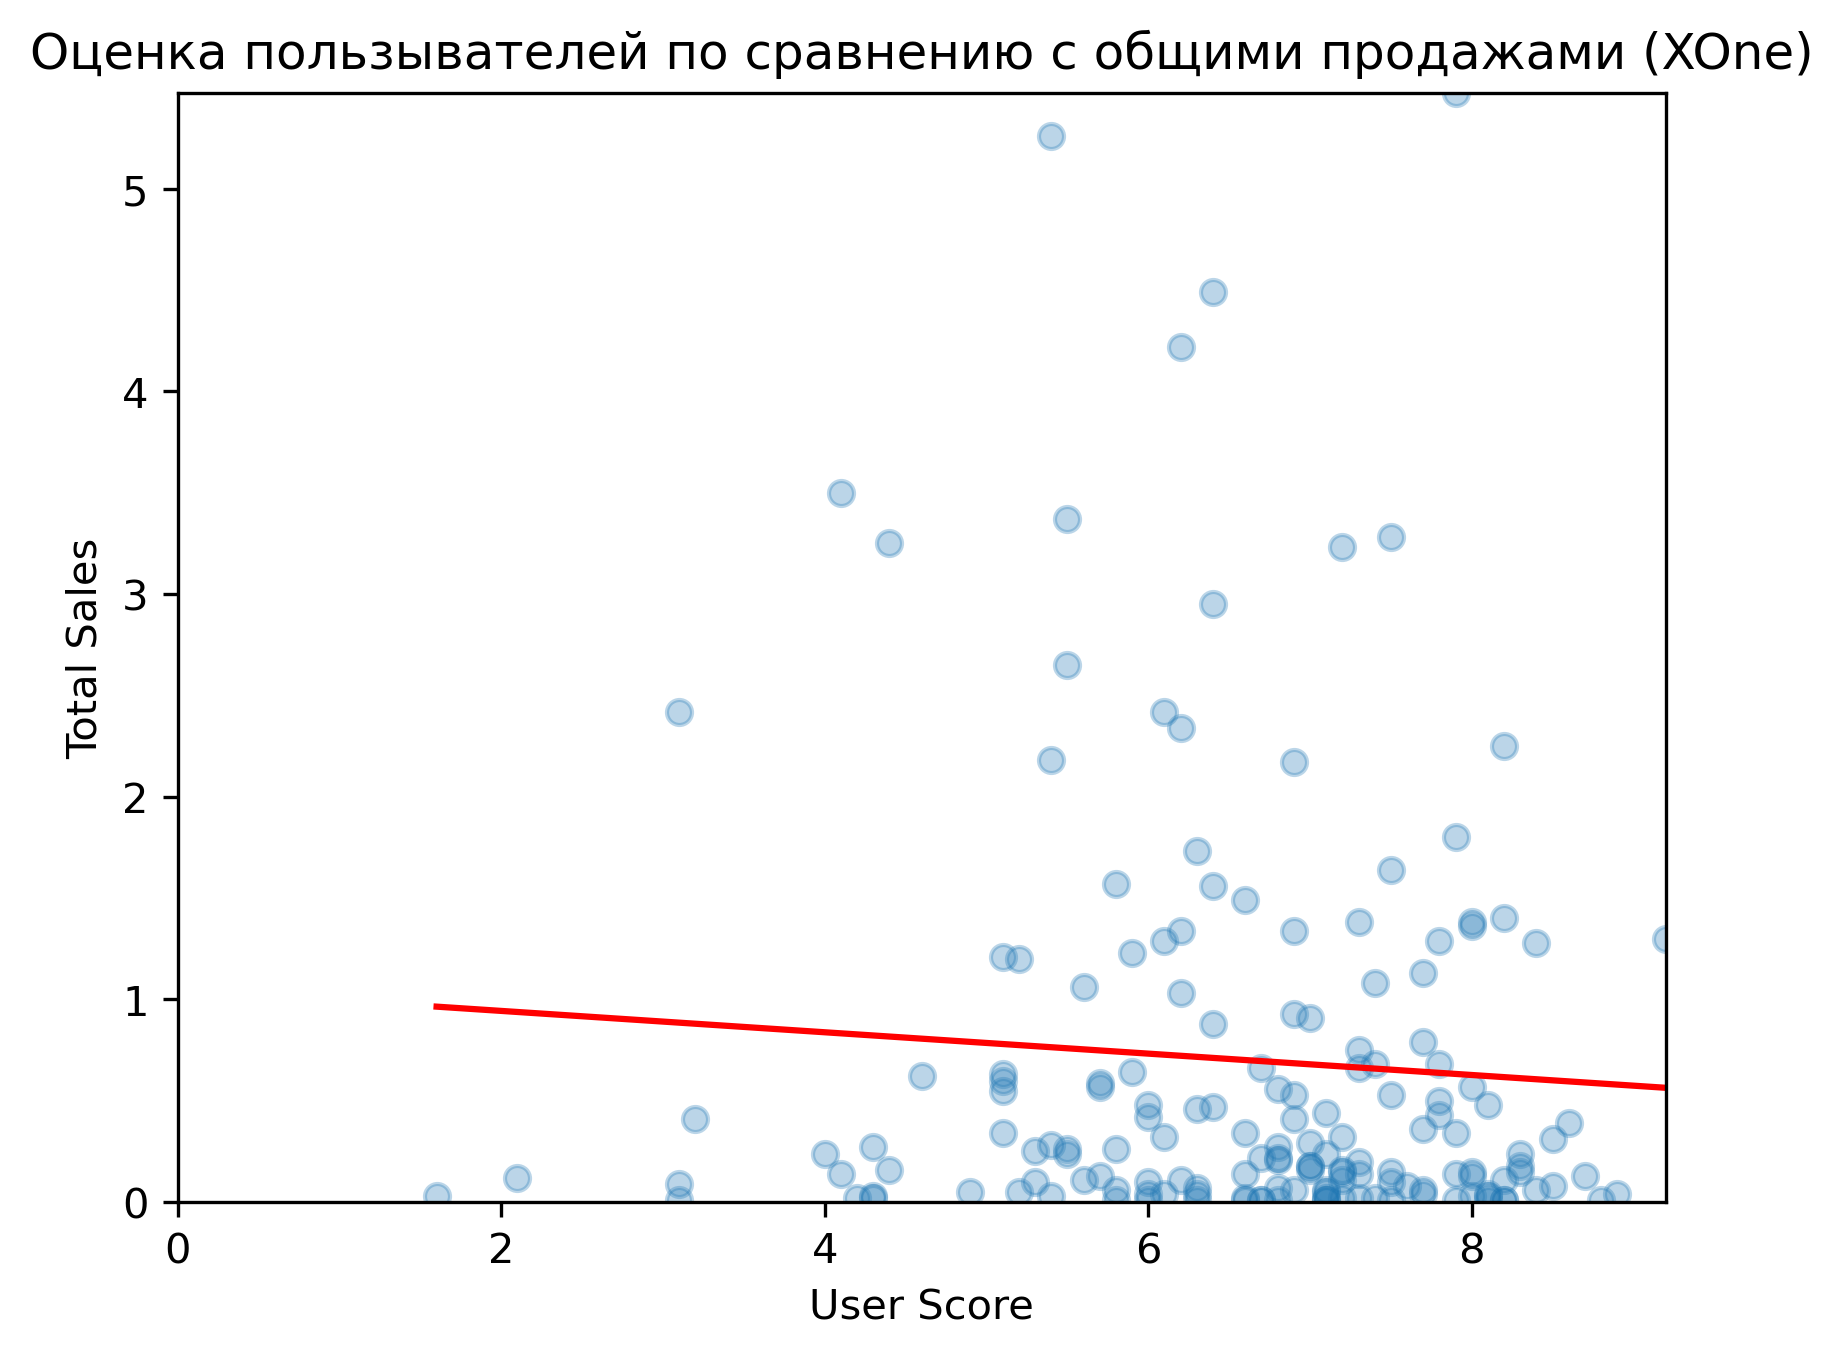

In [73]:
# строим диаграмму рассеяния для critic_score
plt.scatter(df_XOne['user_score'], df_XOne['total_sales'], alpha=0.3)
plt.title('Оценка пользывателей по сравнению с общими продажами ({})'.format('XOne'))
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.ylim(0, df_XOne['total_sales'].max())
plt.xlim(0, df_XOne['user_score'].max())
plt.plot(np.unique(df_XOne['user_score']), np.poly1d(np.polyfit(df_XOne['user_score'], df_XOne['total_sales'], 1))(np.unique(df_XOne['user_score'])), color='red')
plt.show()

- наблюдаем общий тренд на снижение
- то есть не смотря на оценку пользывателей игры могут хорошо продоваться, так же присутствуют аномальные значения
- больше всего зачений около 7

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [74]:
#группируем по жанрам
sales_by_genre = df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

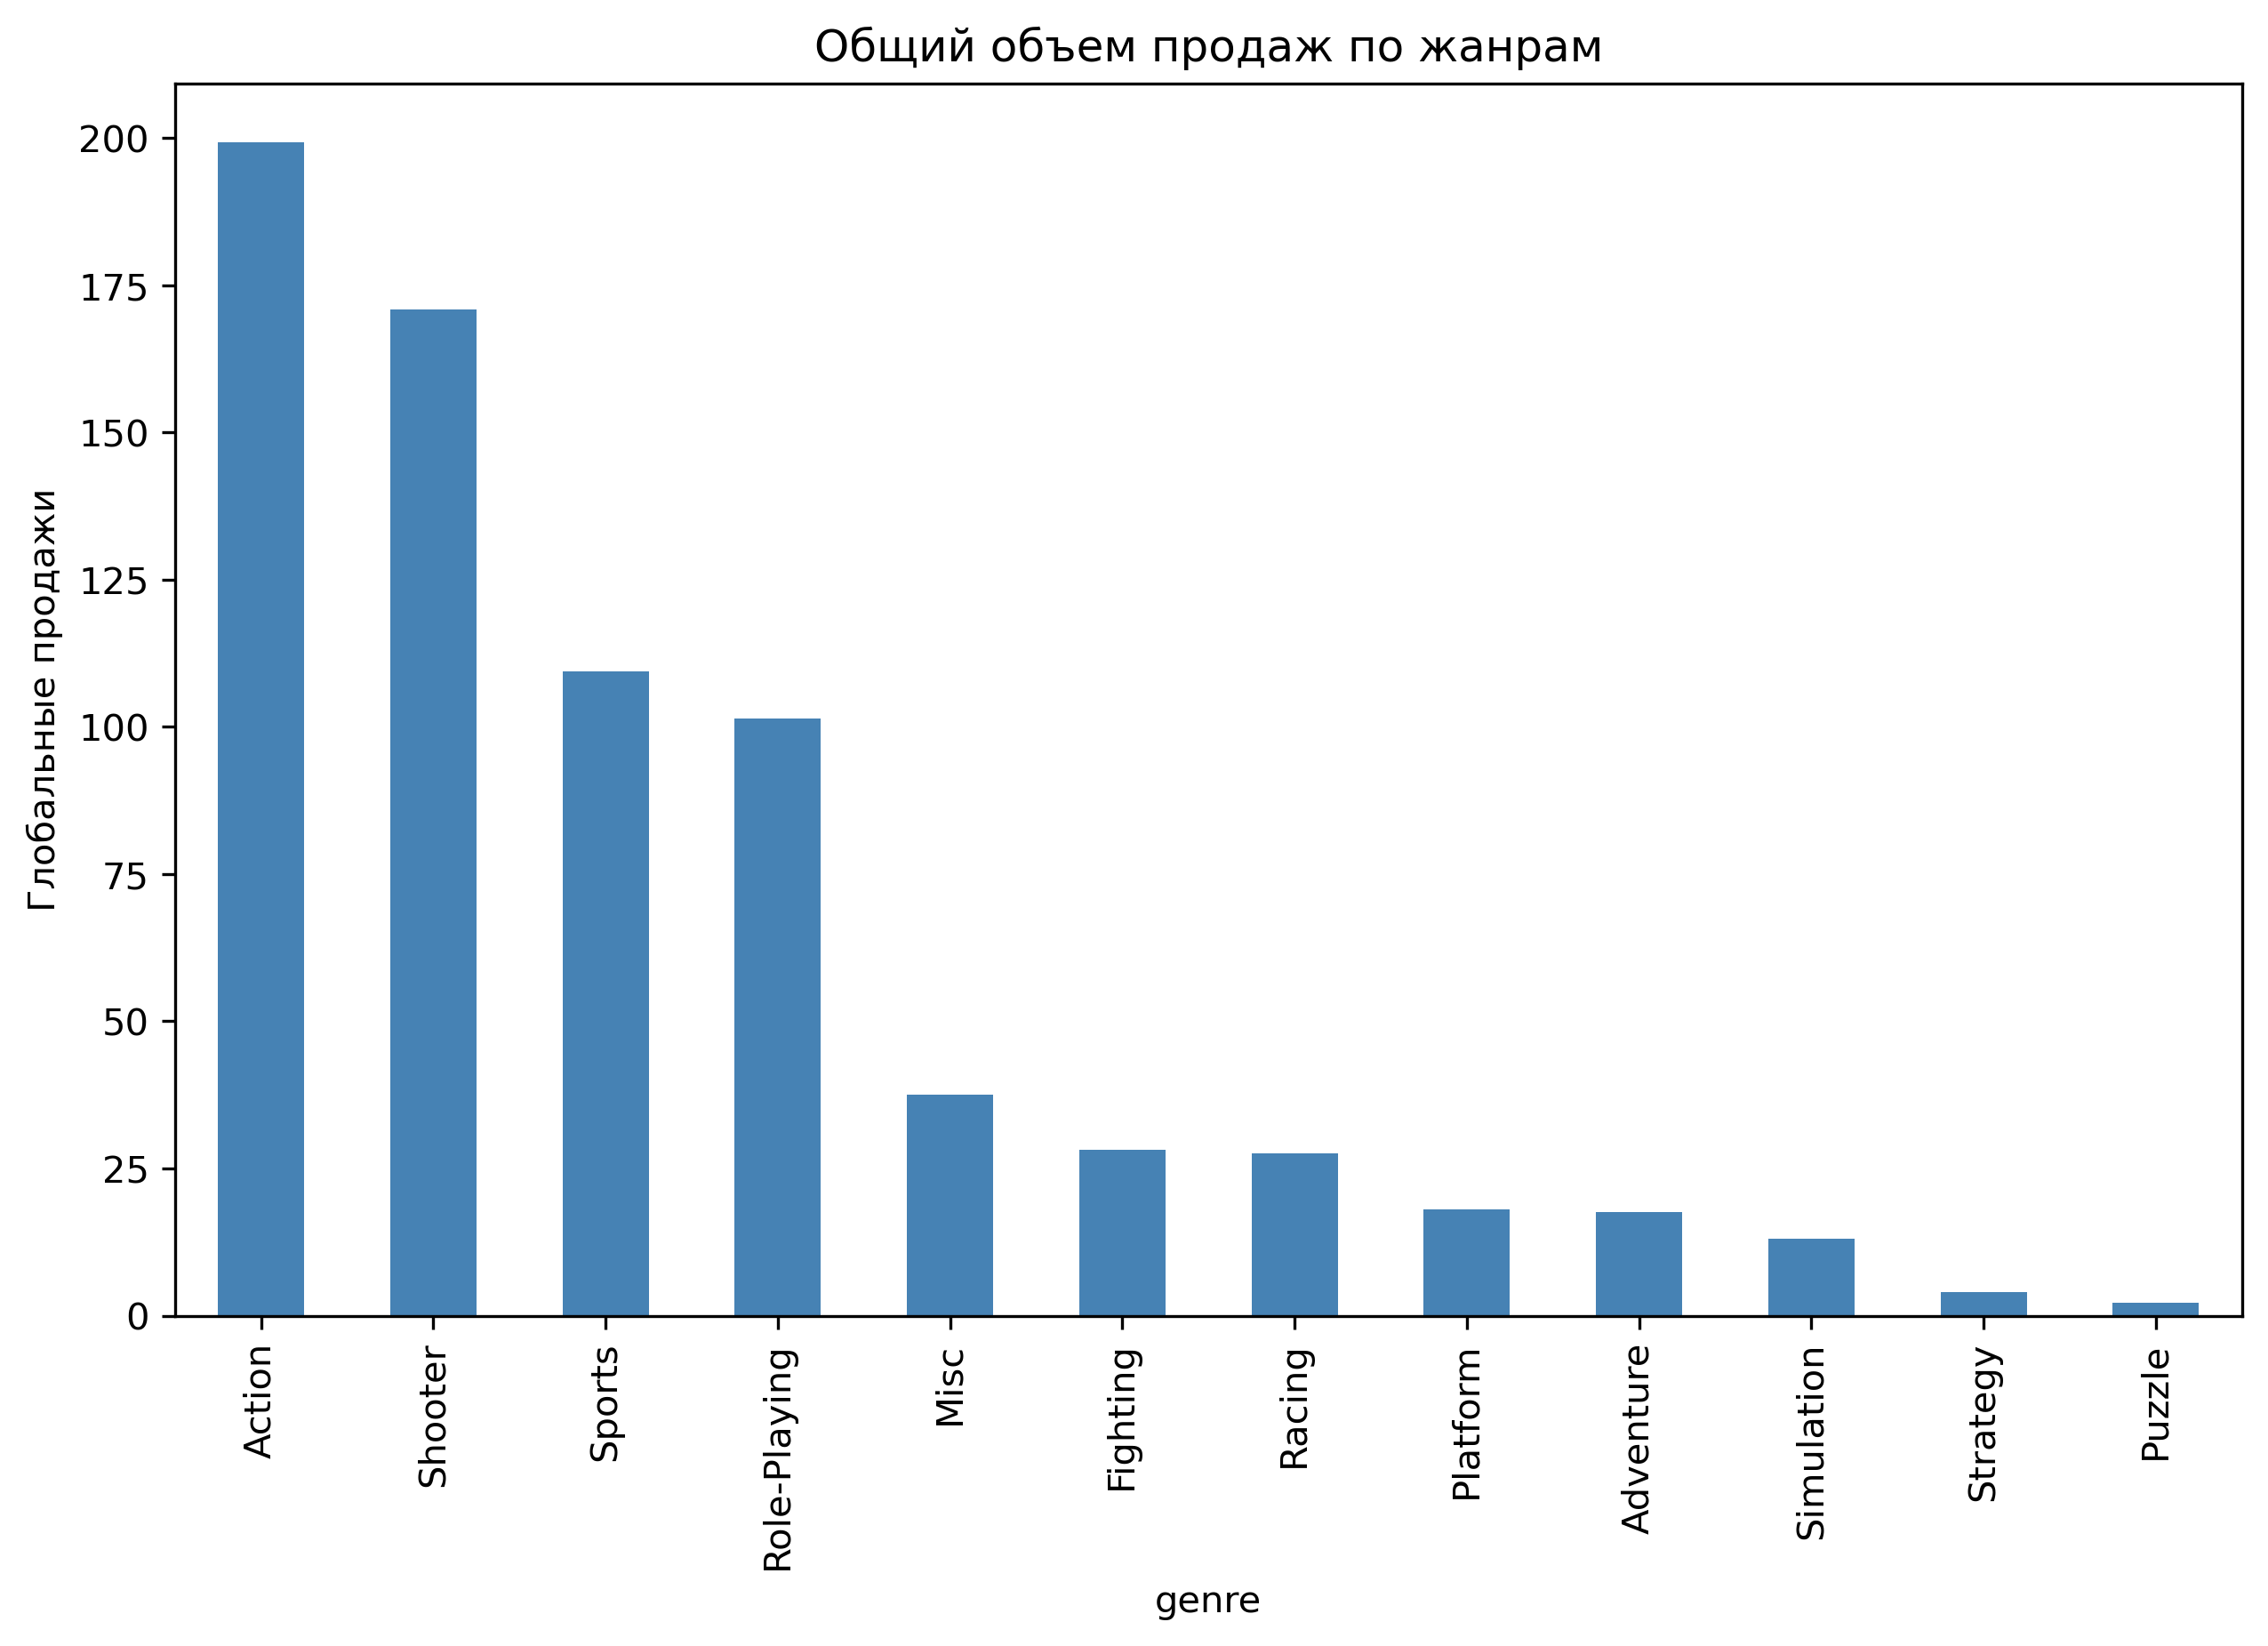

In [75]:
#строим график
sales_by_genre.plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title('Общий объем продаж по жанрам')
plt.ylabel('Глобальные продажи')
plt.show()


- По графику видим, что наиболее прибыльными жанрами являются Action, Sports, Shooter и Role-Playing. Также видно, что некоторые жанры имеют высокие продажи (более 100к копий), такие как Action, Sports, Shooter, Role-Playing, а некоторые имеют низкие продажи (менее 25к копий), такие как Strategy, Puzzle, Adventure, Simulation.

- Таким образом, мы можем сделать вывод, что некоторые игровые жанры имеют более высокие продажи, чем другие, и что наиболее прибыльными жанрами являются Action, Sports, Shooter и Role-Playing.



In [76]:
#посмотрим на топ 5 экшенов по продажам
action_games = df_actual[df_actual['genre'] == 'Action']
popular_action_games = action_games.sort_values(by=['total_sales'], ascending=False).head()
popular_action_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


In [77]:
sales_by_genre_median = df_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

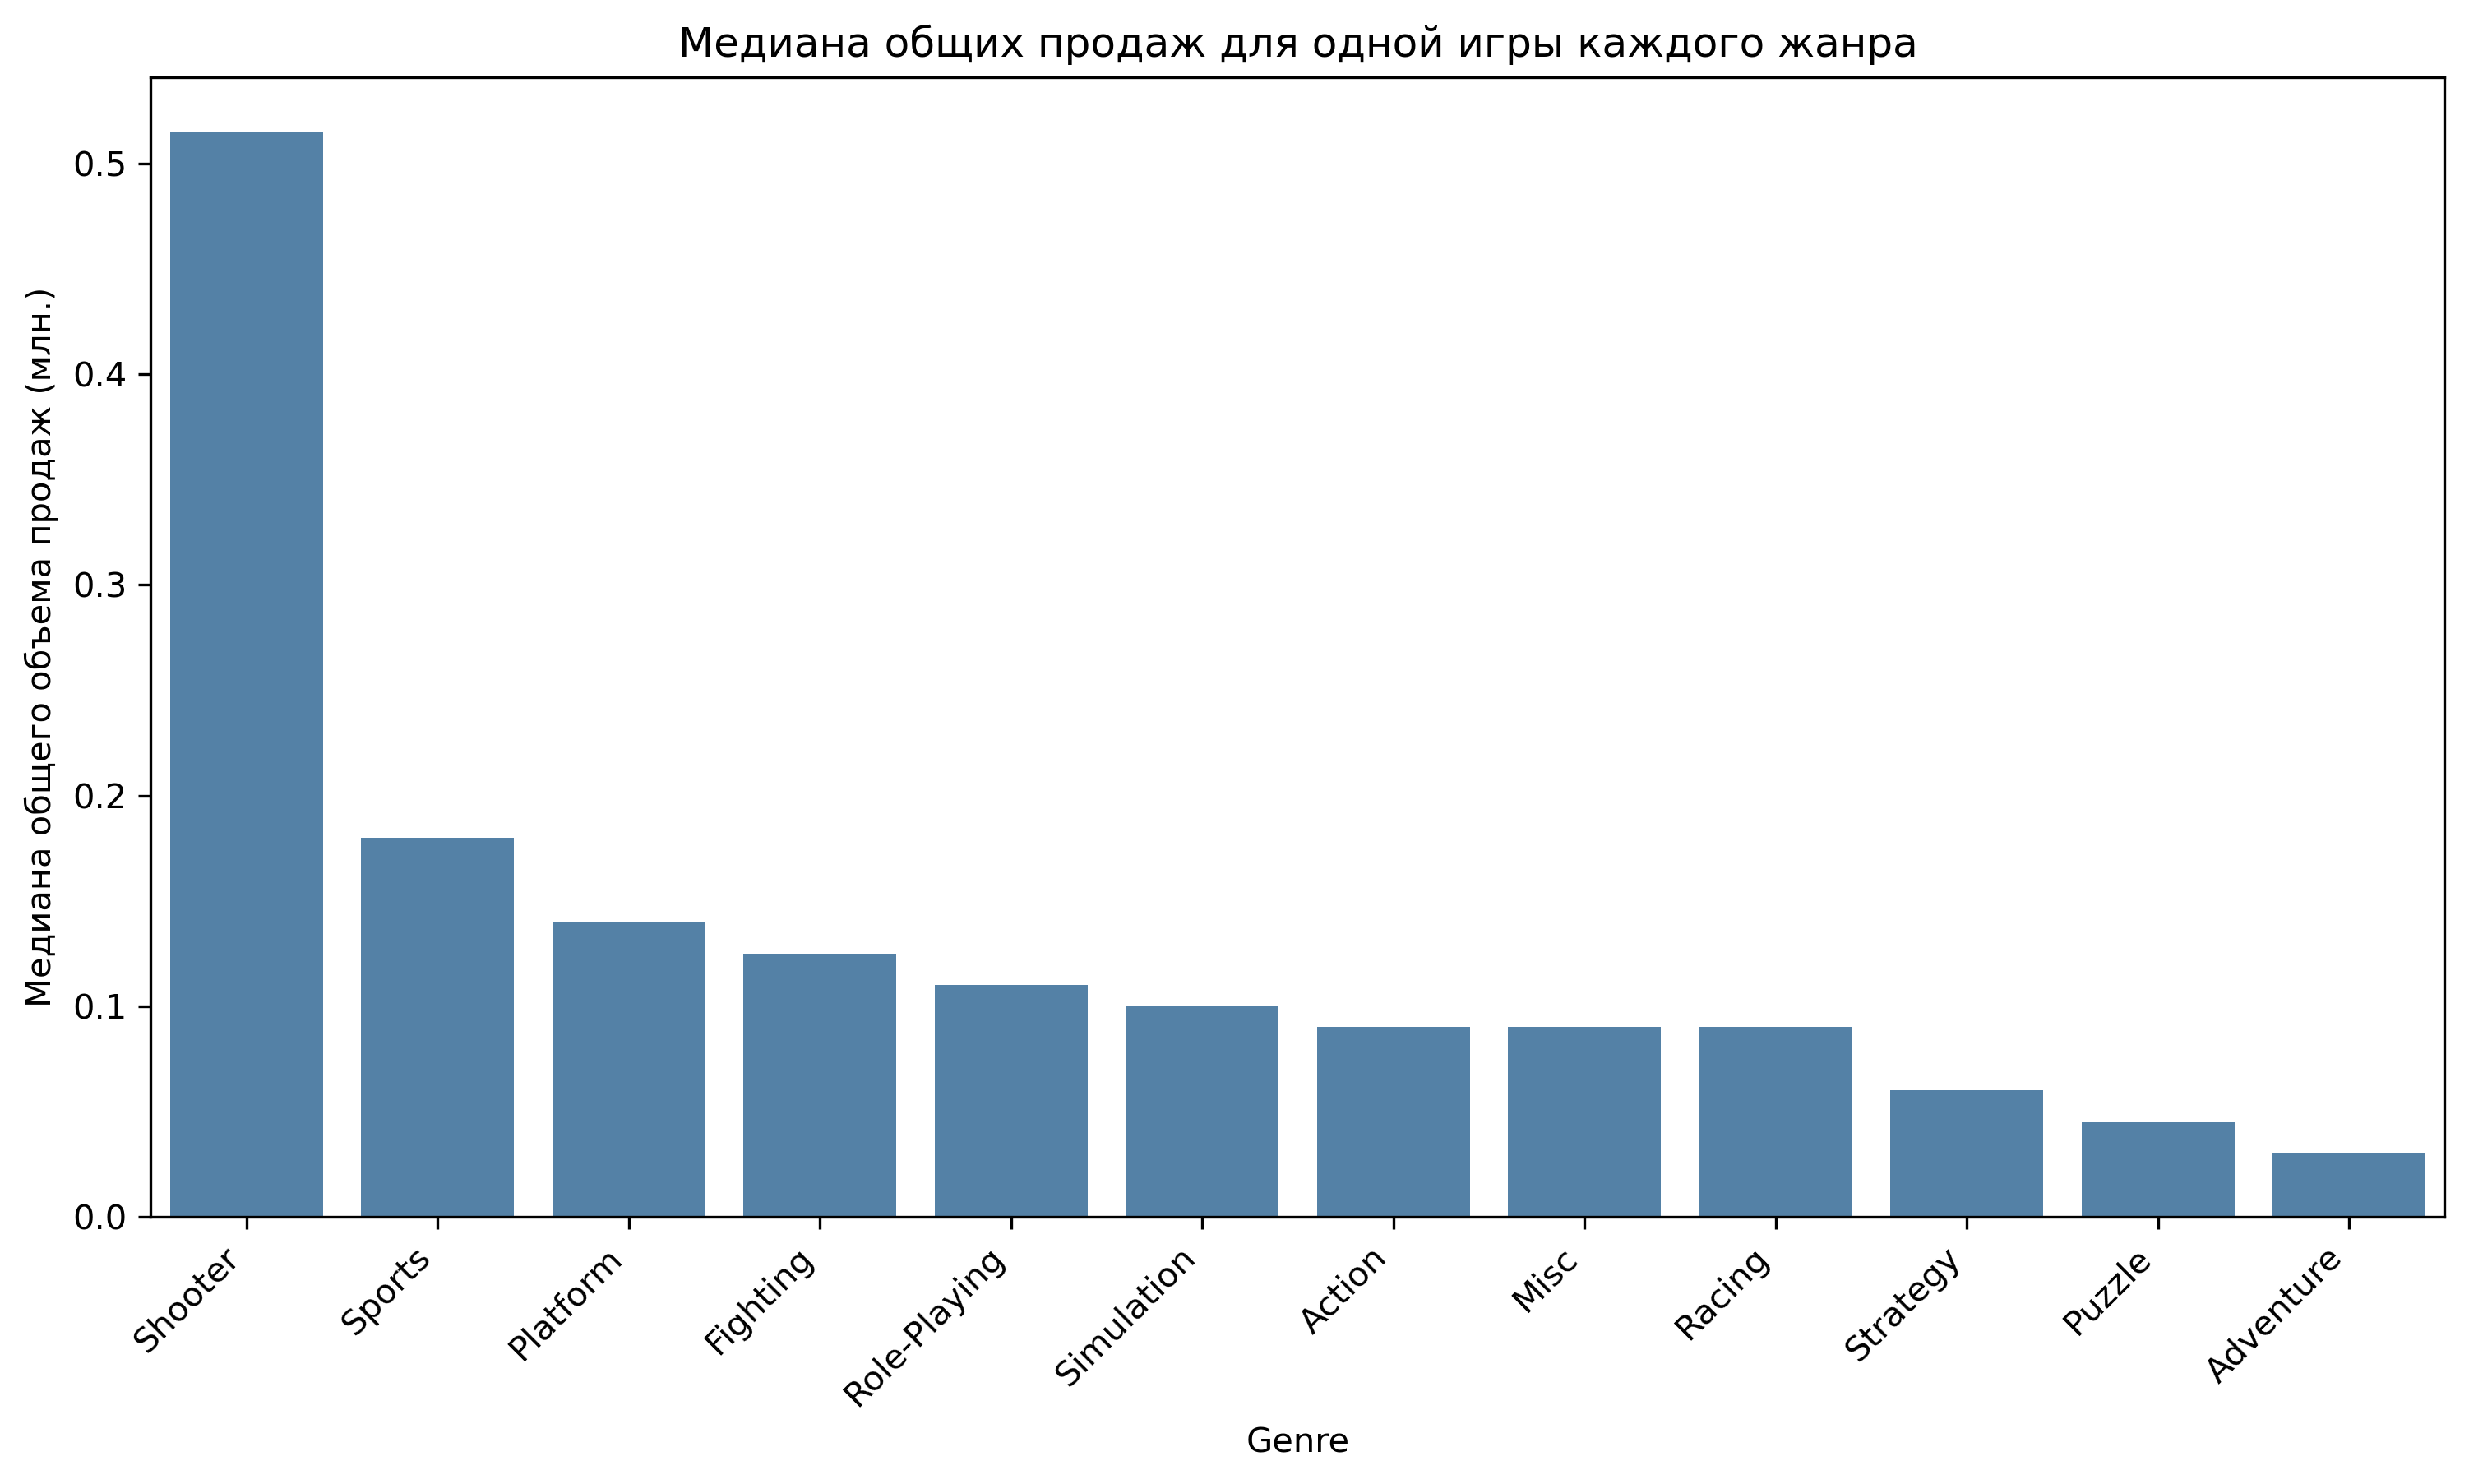

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_genre_median.index, y=sales_by_genre_median.values, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Медиана общего объема продаж (млн.)')
plt.title('Медиана общих продаж для одной игры каждого жанра')
plt.show()

как видим по графику, Shooter сильно превосходит всеъ с медианй продаж в 0,5, остальные жанры в районе 0,1-02.

In [79]:
#посмотрим на топ 5 шутеров по продажам
shooter_games = df_actual[df_actual['genre'] == 'Shooter']
popular_shooter_games = shooter_games.sort_values(by=['total_sales'], ascending=False).head()
popular_shooter_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64


In [80]:
#топ10 игр по прадажам на всех платформах
df_actual.sort_values(by=['total_sales'], ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


#### Вывод:

- как можно видеть на графиках, популярные жанры Action, Sports, Shooter, Role-Playing. 
- топ 5 Action игр gtav , assasins creed: unity, uncarted, the last of us
- а если смотреть по медиане продаж, то шутеры в более 2 раза опережают всех. вот 5 популярных шутеров: Call of Duty, Star Wars Battlefront (2015)
- причем все эти игры между двумя платформами: PS4 и xOne, на боксплоте уних более длинные усы, значит платформы более успешны и имеют успешные игры с высокими продажами
- так же в топ10 игр можно наблюдать игры для 3DS

### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [81]:
#группируем данные по платформам
df_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().sort_values('total_sales', ascending=False).head(5)

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS4,98.61,130.04,15.02,288.15
XOne,81.27,46.25,0.32,140.36
3DS,22.64,16.12,44.24,86.68
PS3,22.05,25.54,11.22,68.18
X360,28.30,15.49,0.08,48.22


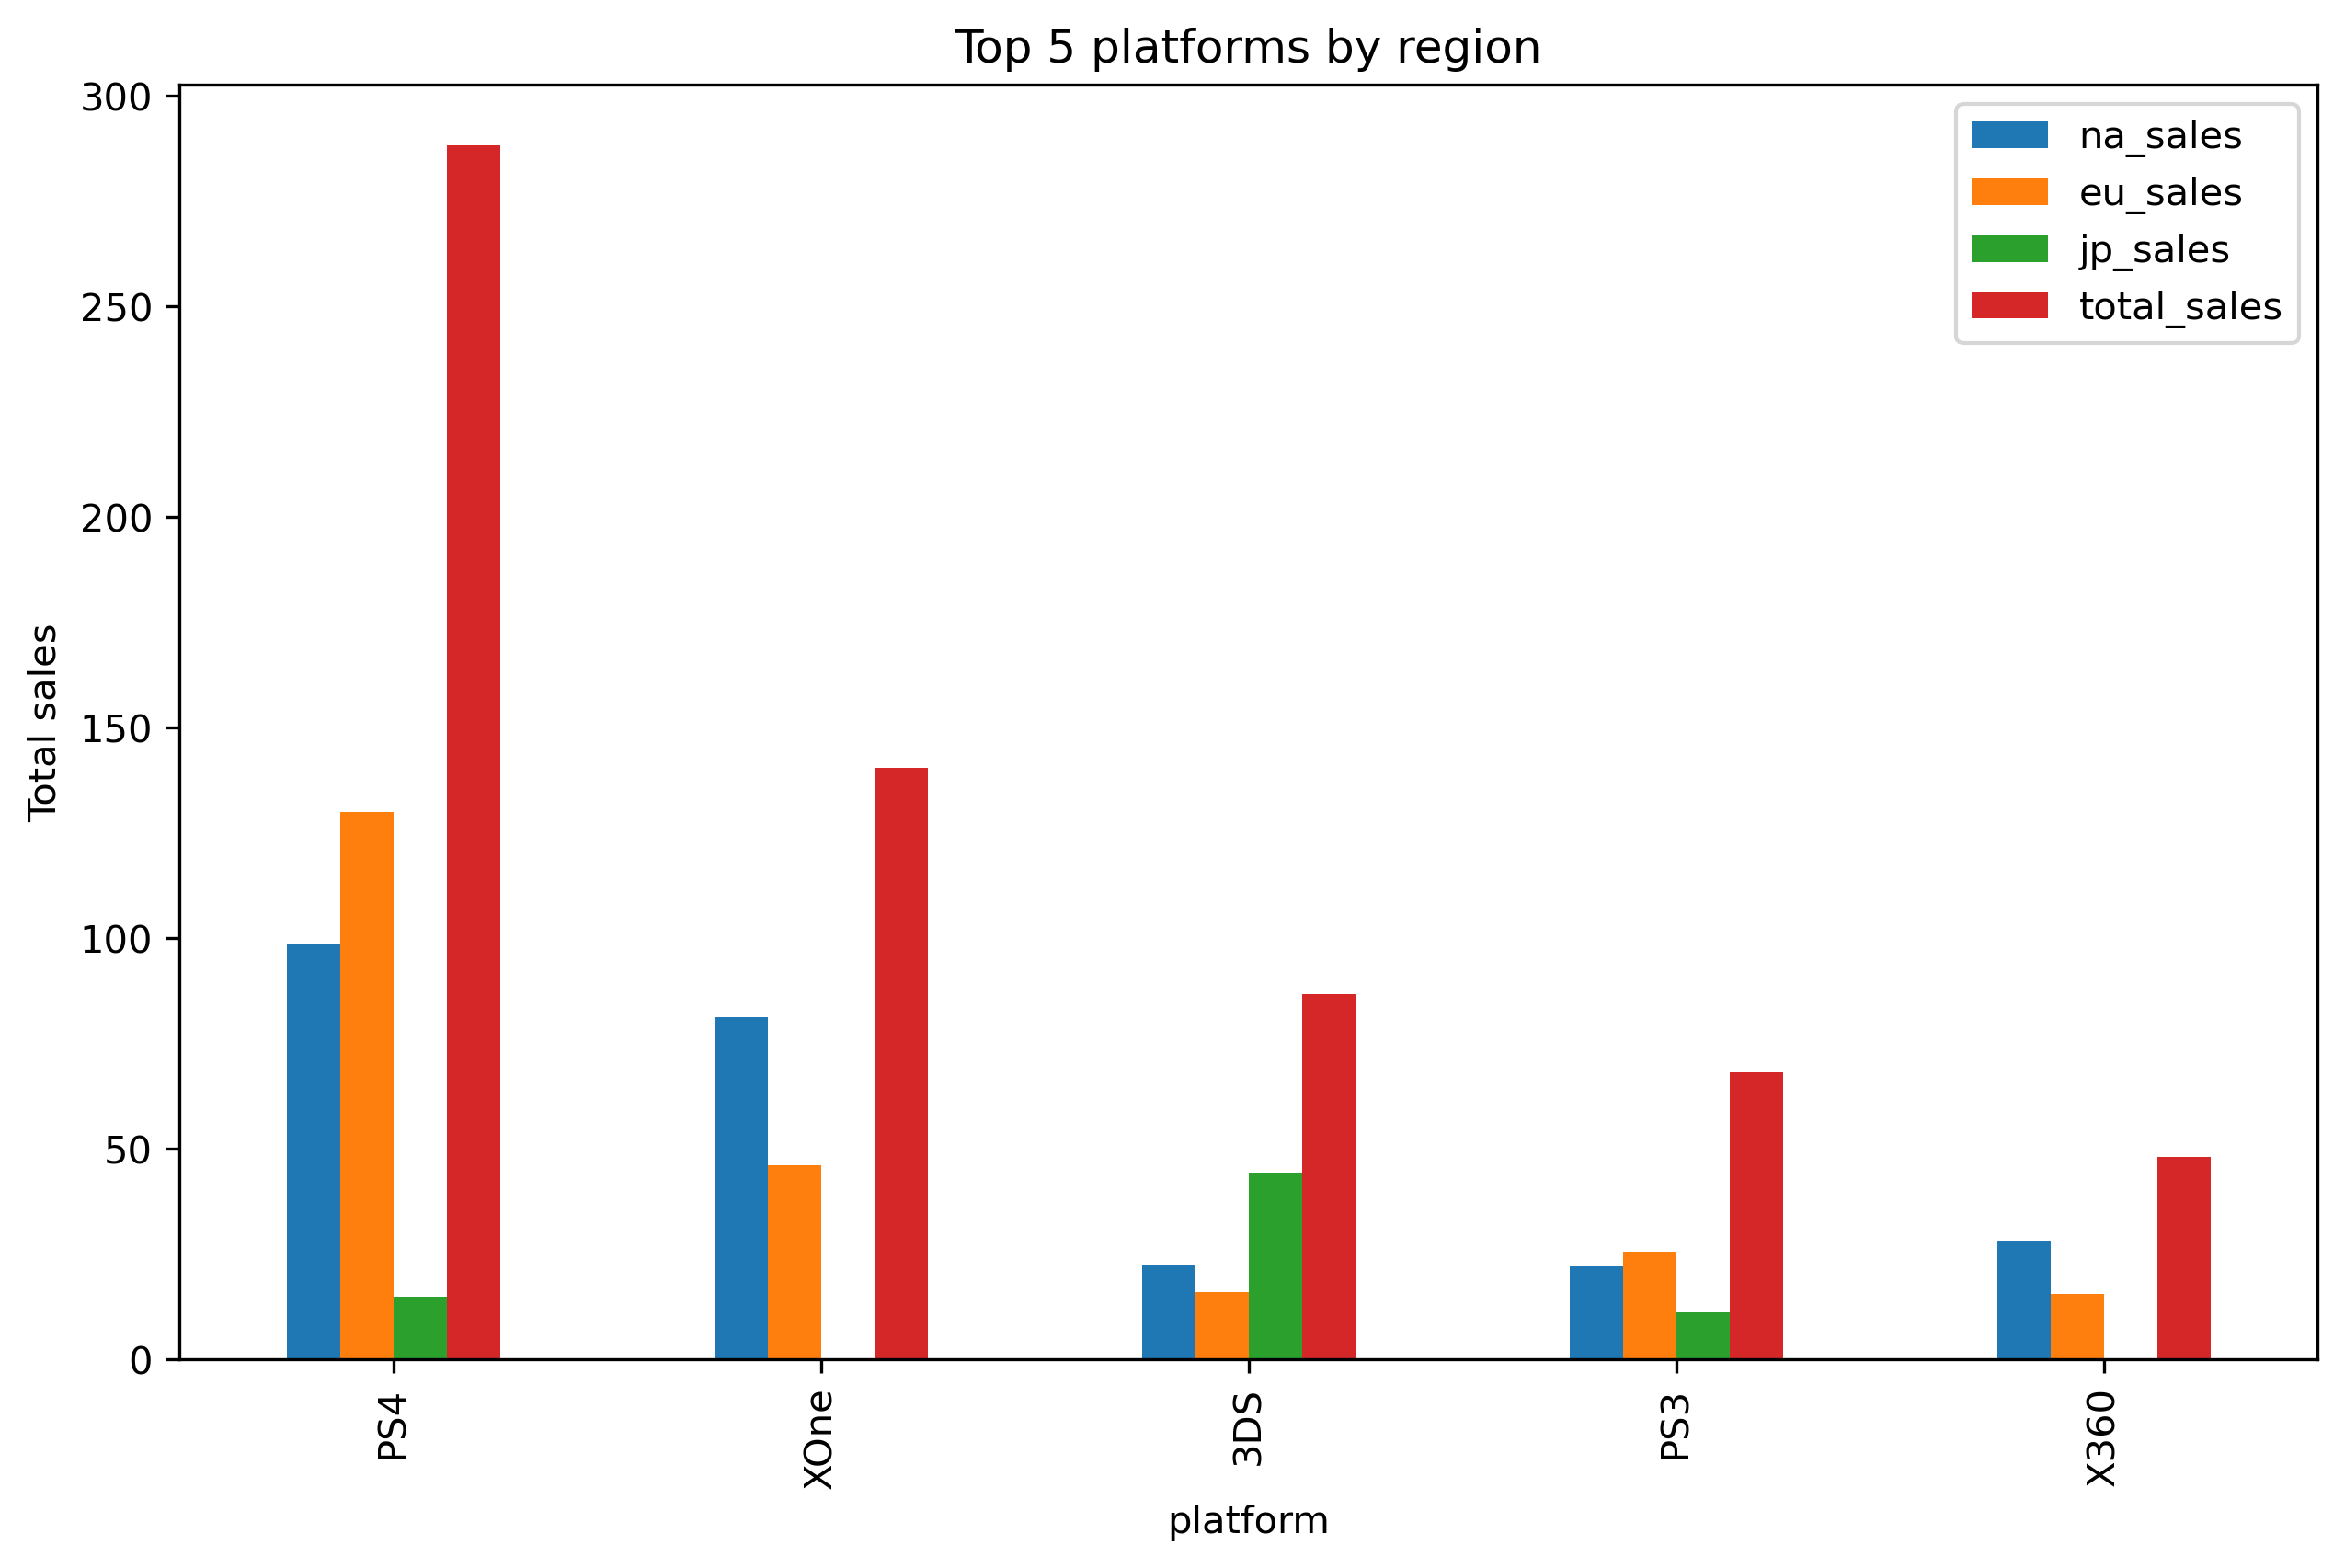

In [82]:
# Диаграммы распределения продаж по платформам для каждого региона
df_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().sort_values('total_sales', ascending=False).head(5).plot(kind='bar', figsize=(10,6))
plt.title('Top 5 platforms by region')
plt.ylabel('Total sales')
plt.show()

По платформам, по графику видим что:
- северная америка, топ 5 это: PS4, XOne
- европа, PS4, XOne
- япония, лидируют 3DS, PS4  Чувствуется поддежка местного производителя.
- В целом можно увидеть схожесть NA и EU, на первом месте у них PS4, XOne.

In [83]:
# группируем данные по жанрам
df_actual.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().sort_values('total_sales', ascending=False).head(5)

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,72.53,74.68,29.58,199.36
Shooter,79.02,65.52,4.87,170.94
Sports,46.13,45.73,3.26,109.48
Role-Playing,33.47,28.17,31.16,101.44
Misc,15.05,12.86,5.61,37.55


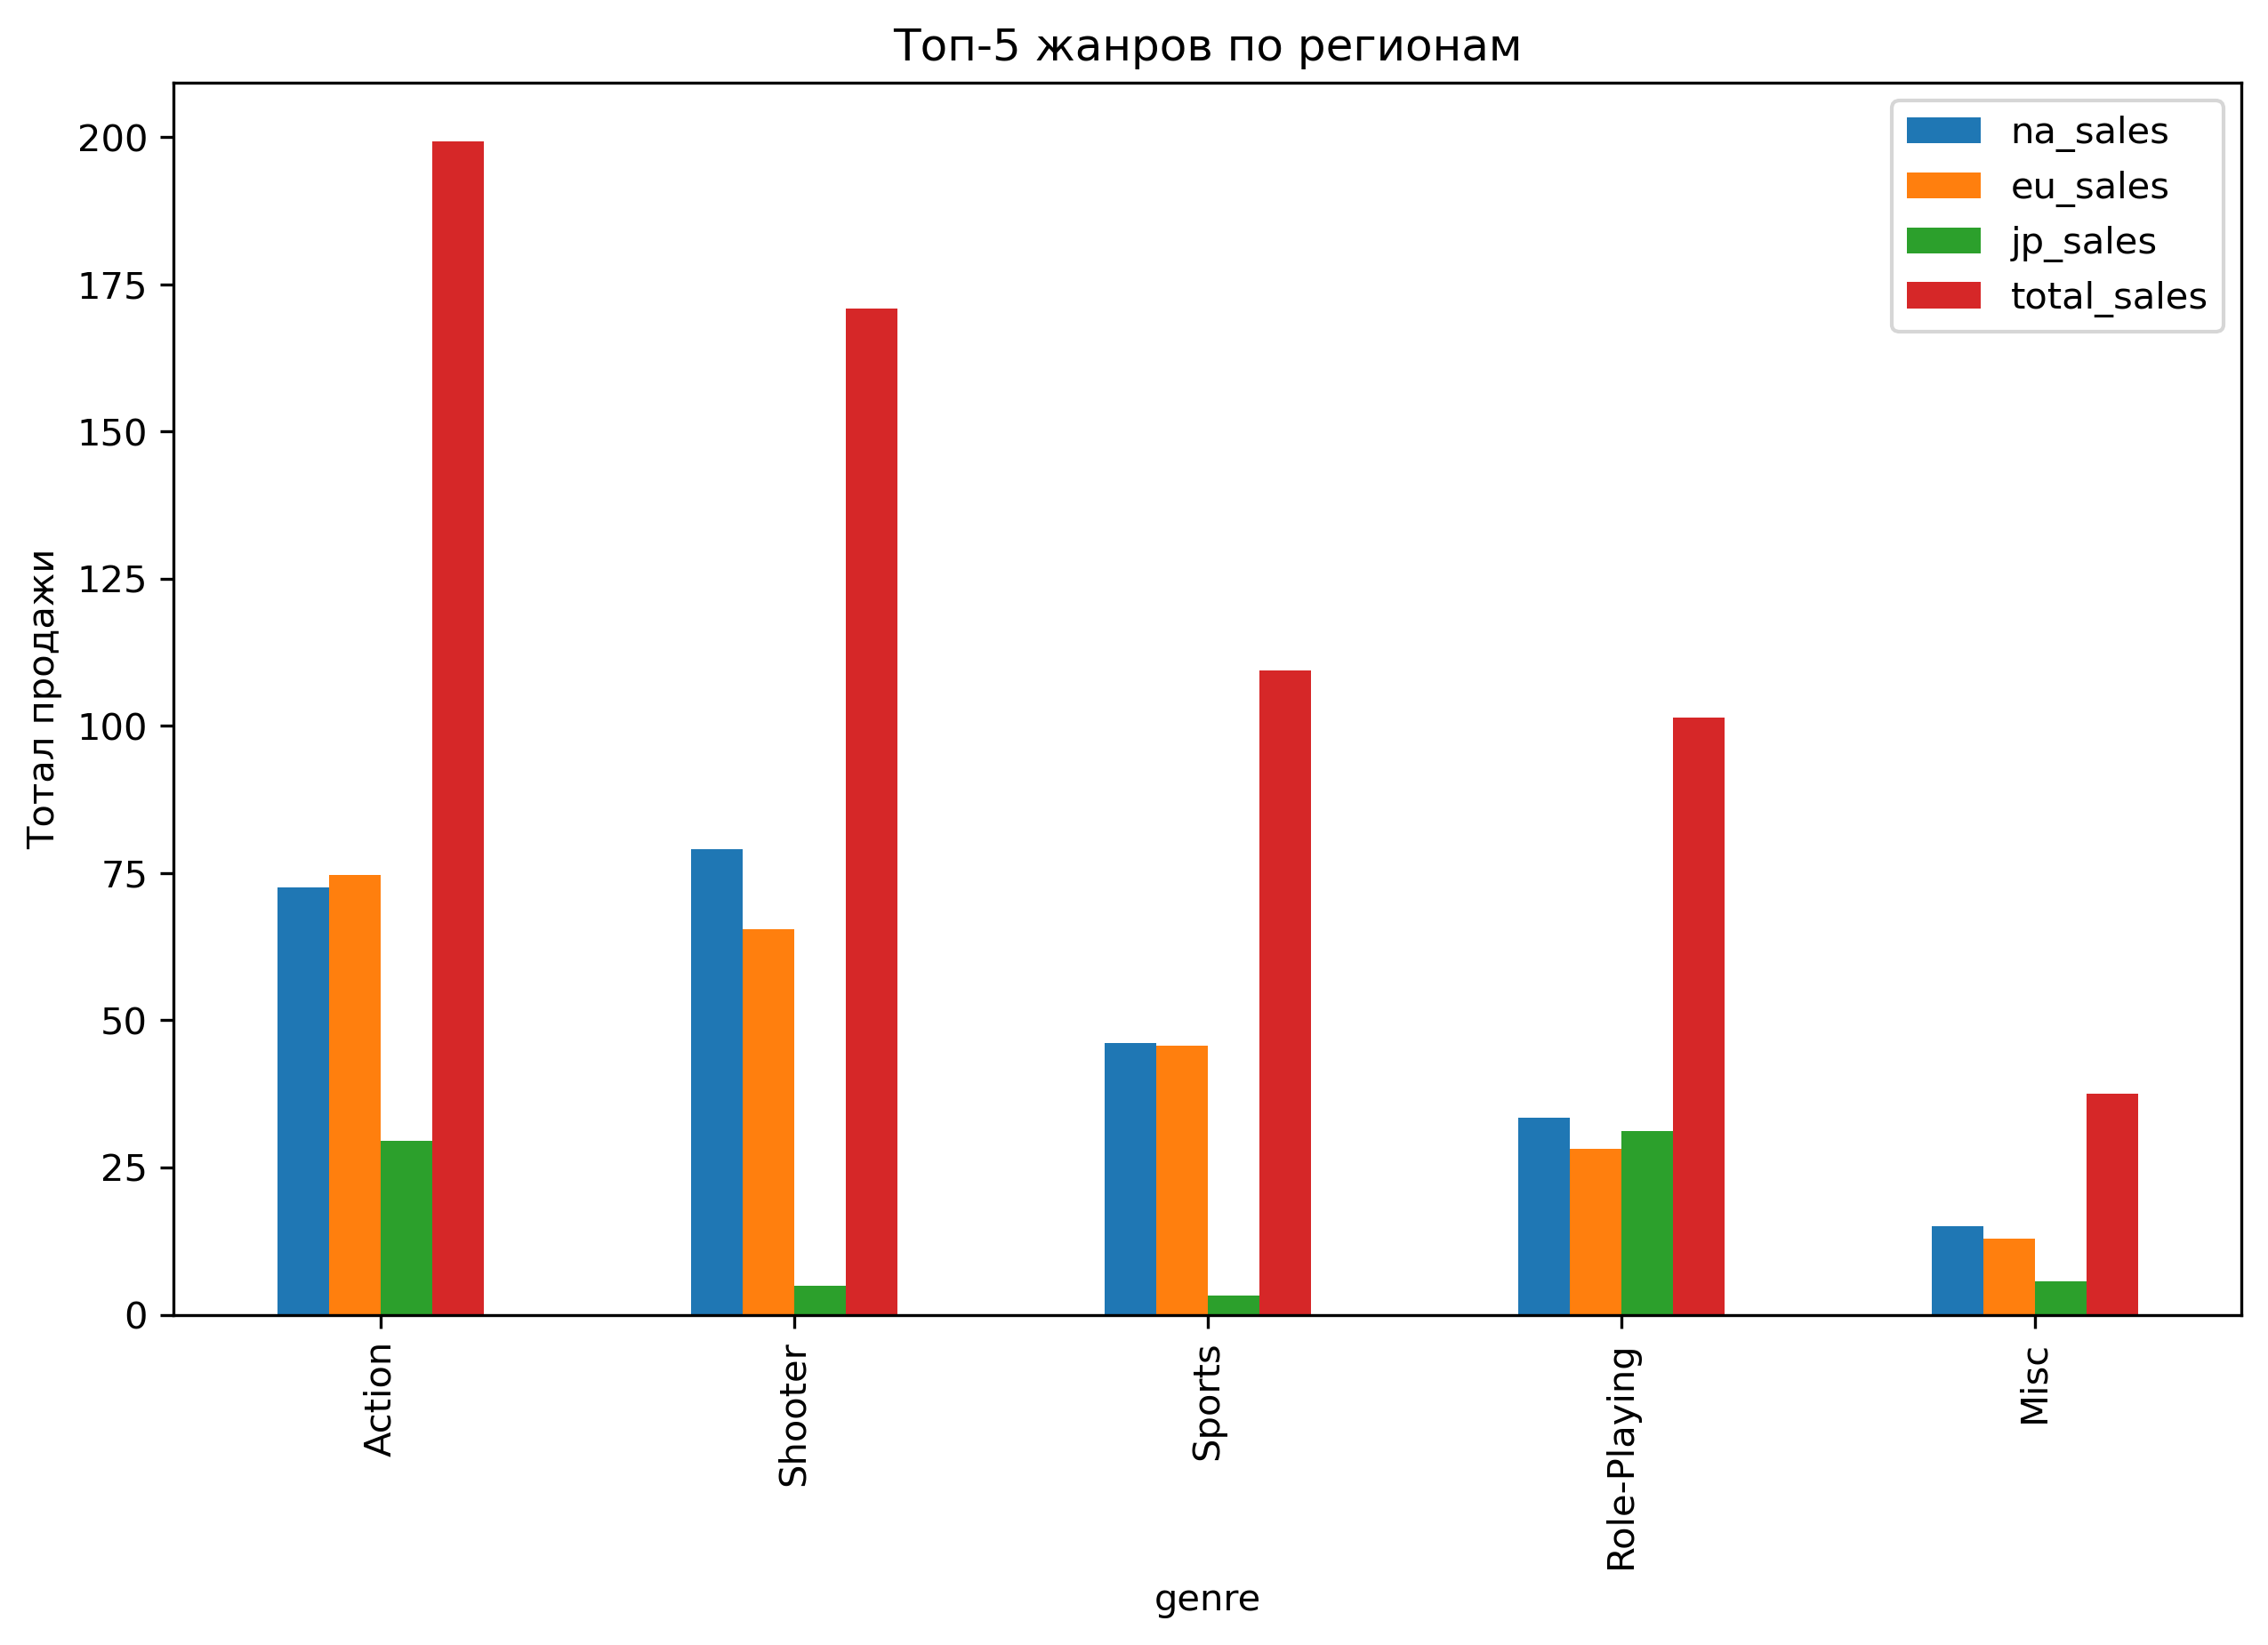

In [84]:
# Диаграммы распределения продаж по жанрам для каждого региона
df_actual.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().sort_values('total_sales', ascending=False).head(5).plot(kind='bar', figsize=(10,6))
plt.title('Топ-5 жанров по регионам')
plt.ylabel('Тотал продажи')
plt.show()

 По жанрам, по графику видим что:
- NA - первые места Action и Shooter, 75к продаж. Далее Sport и  Role-Playing, 50к. 
- EU - так же первое место Action и Shooter, 75к продаж. Далее Sport и  Role-Playing, 50к и 40к. 
- JP - первые места Role-Playing и Action  25 к копий, третье место Misc 10k
 Можно наблюдать у всех общую любовь к жанрам Action, Sports и Shooter, а вот JP конечно отличилось своей любовью к Role-Playing. Для будущего нужно учитывать особенносьти этого рынка.

In [85]:
# группируем данные по рейтингу
df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,50.74,58.06,8.94,133.13
E10+,33.23,26.16,4.46,71.68
M,96.42,93.44,8.01,226.54
T,38.95,34.07,14.78,99.13


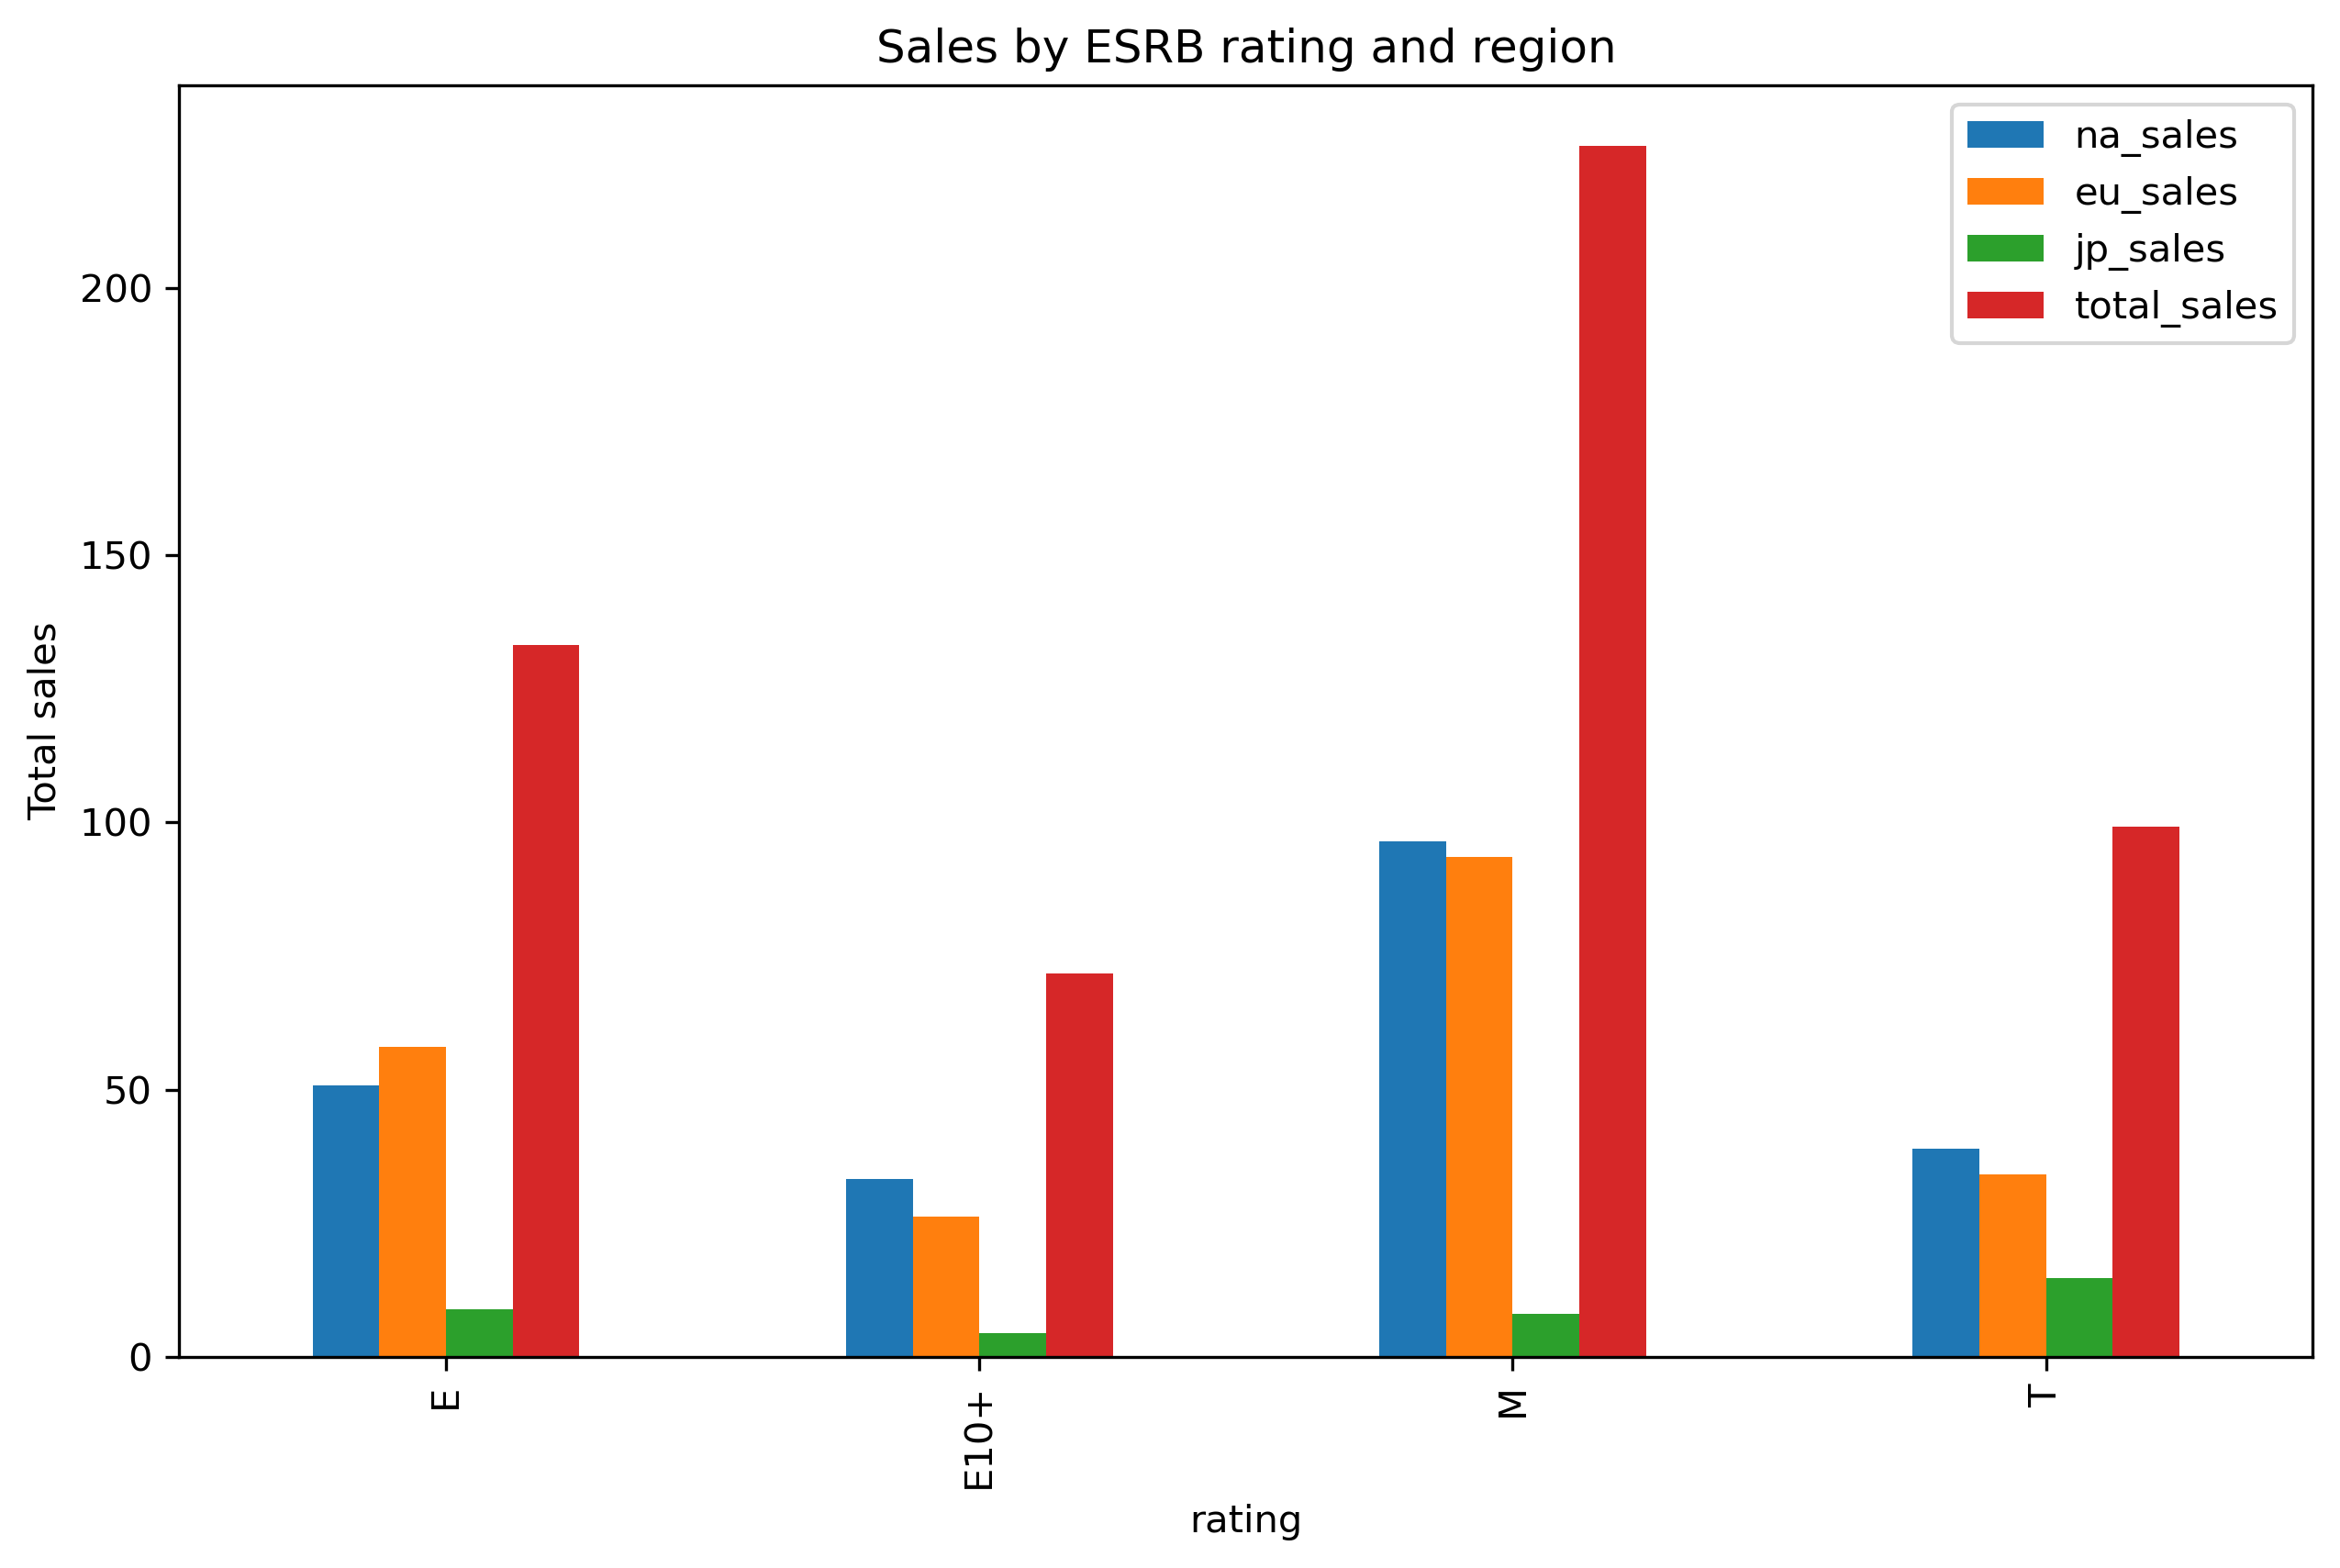

In [86]:
# Диаграммы распределения продаж по рейтингу ESRB для каждого региона
df_actual.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().plot(kind='bar', figsize=(10,6))
plt.title('Sales by ESRB rating and region')
plt.ylabel('Total sales')
plt.show()

In [93]:
#группируем по каждому региону для рейтинга ESRB
na_sales_by_rating = df_actual.groupby(['rating']).sum()['na_sales'].sort_values(ascending=False)
eu_sales_by_rating = df_actual.groupby(['rating']).sum()['eu_sales'].sort_values(ascending=False)
jp_sales_by_rating = df_actual.groupby(['rating']).sum()['jp_sales'].sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12144\443443384.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_sales_by_rating = df_actual.groupby(['rating']).sum()['na_sales'].sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_12144\443443384.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eu_sales_by_rating = df_actual.groupby(['rating']).sum()['eu_sales'].sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_12144\443443384.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defaul

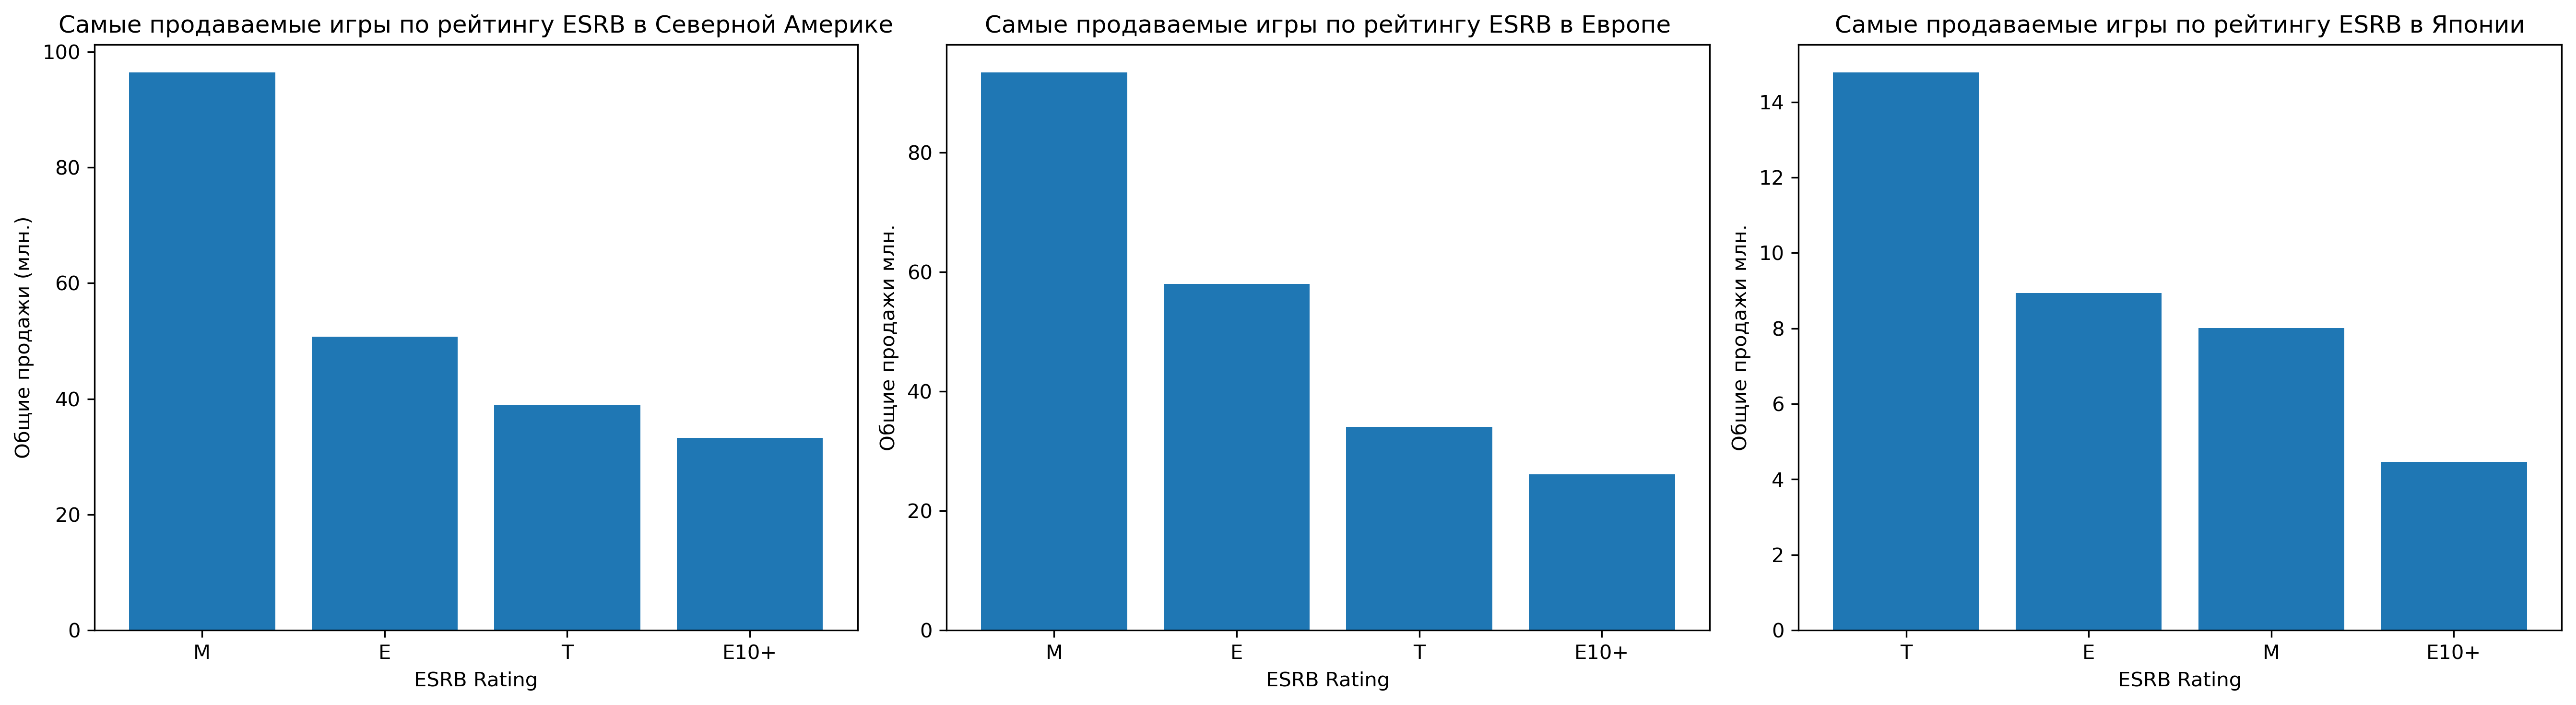

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# гистограмма для NA
axes[0].bar(na_sales_by_rating.index, na_sales_by_rating.values)
axes[0].set_title('Самые продаваемые игры по рейтингу ESRB в Северной Америке')
axes[0].set_xlabel('ESRB Rating')
axes[0].set_ylabel('Общие продажи (млн.)')

#гистограмма для EU
axes[1].bar(eu_sales_by_rating.index, eu_sales_by_rating.values)
axes[1].set_title('Самые продаваемые игры по рейтингу ESRB в Европе')
axes[1].set_xlabel('ESRB Rating')
axes[1].set_ylabel('Общие продажи млн.')

#гистограмма для JP
axes[2].bar(jp_sales_by_rating.index, jp_sales_by_rating.values)
axes[2].set_title('Самые продаваемые игры по рейтингу ESRB в Японии')
axes[2].set_xlabel('ESRB Rating')
axes[2].set_ylabel('Общие продажи млн.')

# регулируем расположение 
plt.tight_layout()

plt.show()

По жанрам, по графику видим что:
- NA - лидерует категория М 100к, далее идут Т и Е около 50к
- EU - так же лидерует категория М 100к, следом категория Т и Е около 50к
- JP - категория Е и Т на первом месте с отметкой 10к, далее М и Е около 0,5к продаж.
Тут также отметим схожесть NA и EU, категория М на первом месте, а Е и Т следом. А по JP Е и Т на первом место, далее М и Е
- Тоесть в топе продаж NA/EU игры с рейтингом для всех и игры для взрослых, а в Японии на первом месте игры для подростков

### Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Для проверки гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC можно использовать t-тест Стьюдента.
Нулевая гипотеза H0: средние пользовательские рейтинги для платформ Xbox One и PC равны.
Альтернативная гипотеза H1: средние пользовательские рейтинги для платформ Xbox One и PC различны.
Зададим уровень статистической значимости alpha = 0.05.

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно

In [89]:
# фильтруем данные за актуальный период
df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

# Извлечение соответствующих данных для проверки гипотез
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df[df['platform'] == 'PC']['user_score'].dropna()

# Тест 1: Пользовательские рейтинги для Xbox One и ПК одинаковы
alpha = 0.05
results1 = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)

print('p-значение:', results1.pvalue)

if results1.pvalue < alpha:
    print("Отклоняем нулевую гипотезу: Оценки пользователей для Xbox One и ПК различны")
else:
    print("Не удается отвергнуть нулевую гипотезу: Пользовательские рейтинги для Xbox One и PC одинаковы")

p-значение: 0.6768244643267683
Не удается отвергнуть нулевую гипотезу: Пользовательские рейтинги для Xbox One и PC одинаковы


Для проверки гипотезы о различии средних пользовательских рейтингов для жанров Action и Sports также можно использовать t-тест Стьюдента.
Нулевая гипотеза H0: средние пользовательские рейтинги для жанров Action и Sports равны.
Альтернативная гипотеза H1: средние пользовательские рейтинги для жанров Action и Sports различны.
Зададим уровень статистической значимости alpha = 0.05.

In [90]:
# Тест 2: Пользовательские рейтинги для жанров экшн и спорт различны
action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05
results2 = st.ttest_ind(action_ratings, sports_ratings, equal_var=True)

print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print("Отклоняем нулевую гипотезу: Оценки пользователей для жанров экшн и спорт различны")
else:
    print("Не удается отвергнуть нулевую гипотезу: Оценки пользователей для жанров Экшн и Спорт одинаковы")


p-значение: 0.00011694351692995419
Отклоняем нулевую гипотезу: Оценки пользователей для жанров экшн и спорт различны


#### Вывод

Для проверки гипотез был использован t-критерй Стьюдента, так как:
- сравниваются две выборки независимых груп
- данные оценок груп непрерывны
- размер выборок достаточно большой, более 50 наблюдений

#### Шаг 6. Напишите общий вывод

Данные были получены, по каждому столбцу предобработал данные, заполнил пропуска там где посчитал нужным,  дубликатов нет. Исправил названия столбцов, привел к нижнему регистру. Изменил тип столбца year в datetime. Поставил заглушку "-1" в колонке user_score в значении tbd (to be determined - будет определено), как оказалось данные были намеренно заглушены таким способом. Затем провел исследовательский анализ данных, узнал в сколько игр выпускались в разные годы. с 90 годов этот процесс увиличился в разы, и достиг своего пика к 2008-09 годам. Так же узнал о "сроке жизни" платформы, которая составляет 7-10 лет, которая так же сокращается в последнее время. Описал портрет каждого региона, проверил гипотезы. Так же могли наблюдать зависимость по продажам оценки критиков, а вот оценка пользывателей не так сильно влияет на продажи

для компании на 2017 год:
- рекомендуем выставлять популярные жанры, такие как Action. Shooter, Role-Playing и Sports.
- так же учитывать популярность жанров по регионам, так как Role-Playing на первом месте в японии
- покупать игры на современные платформы, такие как PS4, XOne, 3DS
- покупать, но не слишком много, так как видим что жизненный цикл всех платформ близится к концу(место для спойлера про новые платформы)
- продалжать линейку популярных игр, таких как Cod, Fifa, Uncharted, GTA, The Last of Us.
- учитывать особенности местного рынка, если что-то подойдет для Сев. Америки и Европы, оно не всегда подойдет для Японии (жанры и платформы)
- учитывать оценку критиков, так как чем выше их оценка тем игра популярнее.
